<a href="https://colab.research.google.com/github/Flaysty/watermap/blob/main/docs/Vodokanal_EDA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Предиктивная модель прогнозирования показателей водоканала

## Загрузка данных

<------- нужно открыть папочку и положить в нее XLSX файл. Ноутбук рассчитан на загрузку любых XLSX файлов

In [5]:
# ───────────────────────── Imports ─────────────────────────
from pathlib import Path
import pandas as pd

# ───────────────────────── Config ─────────────────────────
# Базовая папка, где лежат .xlsx (по умолчанию — текущая рабочая директория)
base_directory: Path = Path(".").resolve()

# Если нужно искать только в корне без подпапок, замените rglob на glob
excel_file_paths = sorted(
    p for p in base_directory.rglob("*.xlsx")
    if not p.name.startswith("~$")  # игнор временных файлов Excel
)

# ───────────────────────── Read all Excel sheets ─────────────────────────
dataframes_list: list[pd.DataFrame] = []             # сюда собираем все DF
dataframes_index: list[tuple[str, str]] = []         # (file_name, sheet_name) для каждого DF

for excel_path in excel_file_paths:
    # sheet_name=None вернёт dict: {sheet_name: DataFrame}
    sheets_dict = pd.read_excel(excel_path, sheet_name=None, engine="openpyxl")

    for sheet_name, df in sheets_dict.items():
        df = df.copy()

        # Сохраняем источник в атрибутах датафрейма (удобно при отладке)
        df.attrs["source_file_path"] = str(excel_path)
        df.attrs["source_file_name"] = excel_path.name
        df.attrs["source_sheet_name"] = sheet_name

        dataframes_list.append(df)
        dataframes_index.append((excel_path.name, sheet_name))

# ───────────────────────── Build catalog ─────────────────────────
catalog_records = []
for (file_name, sheet_name), df in zip(dataframes_index, dataframes_list):
    catalog_records.append({
        "file_name": file_name,
        "sheet_name": sheet_name,
        "n_rows": df.shape[0],
        "n_cols": df.shape[1]
    })

dataframe_catalog: pd.DataFrame = pd.DataFrame(catalog_records)

# Удобный словарь: ключ "file.xlsx::Sheet1" -> DataFrame
dataframes_by_source: dict[str, pd.DataFrame] = {
    f"{file_name}::{sheet_name}": df
    for (file_name, sheet_name), df in zip(dataframes_index, dataframes_list)
}

# ───────────────────────── Usage examples ─────────────────────────
print(f"Found {len(excel_file_paths)} .xlsx files.")
print(f"Collected {len(dataframes_list)} DataFrames (all sheets from all files).")

# Посмотреть каталог источников
display(dataframe_catalog)

# Пример доступа к первому датафрейму
if dataframes_list:
    first_df = dataframes_list[0]
    print("First DF source:", first_df.attrs["source_file_name"], "—", first_df.attrs["source_sheet_name"])
    display(first_df.head())

# Пример доступа по имени файла и листа:
# key = "Посуточная ведомость водосчетчика ХВС ИТП.xlsx::Лист1"
# display(dataframes_by_source[key].head())


Found 3 .xlsx files.
Collected 3 DataFrames (all sheets from all files).


,file_name,sheet_name,n_rows,n_cols
0,Посуточная ведомость ОДПУ ГВС.xlsx,ОДПУ ГВС,720,7
1,Посуточная ведомость водосчетчика ХВС ИТП.xlsx,Водосчетчик ИТП ХВС,720,4
2,Посуточная ведомость водосчетчика ХВС ИТП_2.xlsx,Водосчетчик ИТП ХВС,720,3


First DF source: Посуточная ведомость ОДПУ ГВС.xlsx — ОДПУ ГВС


,Дата,"Время суток, ч","Подача, м3","Обратка, м3","Потребление за период, м3","Т1 гвс, оС","Т2 гвс, оС"
0,01.04.2025,0-1,0.23,0.12,0.11,60,42
1,01.04.2025,1-2,0.09,0.05,0.04,60,42
2,01.04.2025,2-3,0.11,0.06,0.05,60,42
3,01.04.2025,3-4,0.11,0.06,0.05,60,42
4,01.04.2025,4-5,0.14,0.08,0.06,60,42


Первый XLSX из списка

In [6]:
dataframes_list[0]

,Дата,"Время суток, ч","Подача, м3","Обратка, м3","Потребление за период, м3","Т1 гвс, оС","Т2 гвс, оС"
0,01.04.2025,0-1,0.23,0.12,0.11,60,42
1,01.04.2025,1-2,0.09,0.05,0.04,60,42
2,01.04.2025,2-3,0.11,0.06,0.05,60,42
3,01.04.2025,3-4,0.11,0.06,0.05,60,42
4,01.04.2025,4-5,0.14,0.08,0.06,60,42
...,...,...,...,...,...,...,...
715,2025-04-30 00:00:00,19-20,0.00,0.00,0.00,48,27
716,2025-04-30 00:00:00,20-21,0.00,0.00,0.00,48,27
717,2025-04-30 00:00:00,21-22,0.00,0.00,0.00,48,27
718,2025-04-30 00:00:00,22-23,0.00,0.00,0.00,48,27


# Визуализация

Автоматически подхватываеются все колонки для визуализации

### ХВС

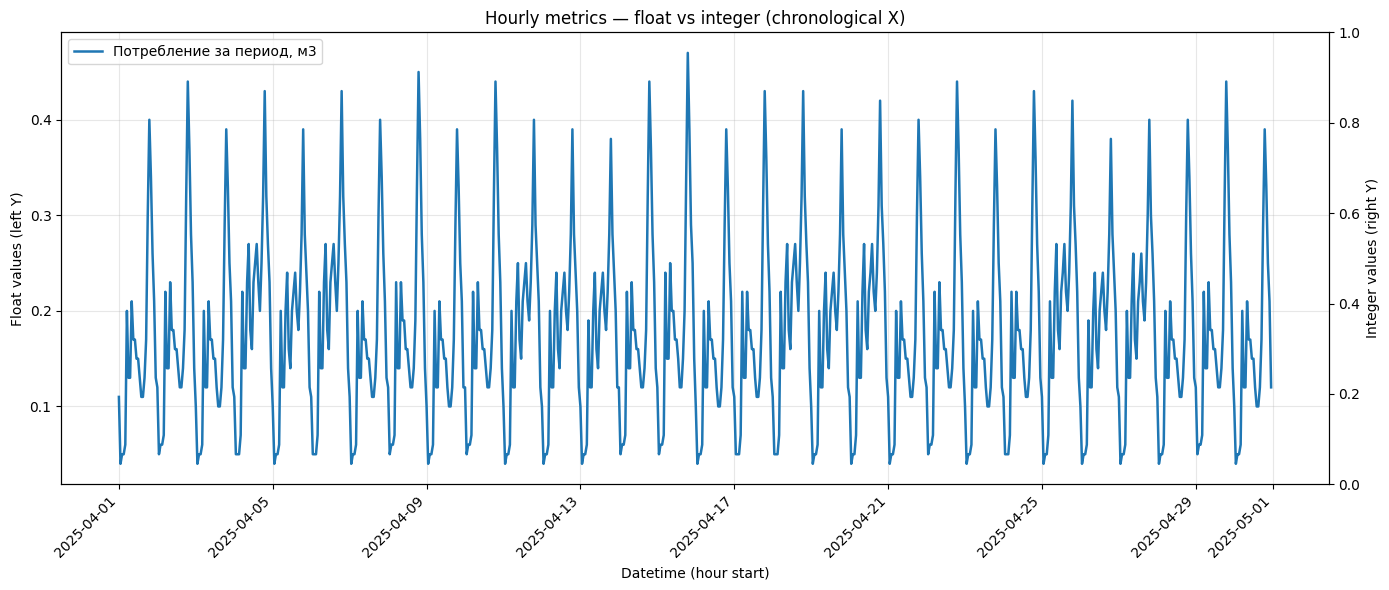

Index levels (df_indexed): ['hour_start', 'date']
Float columns: ['Потребление за период, м3']
Integer-like columns: []


In [7]:
# ───────────────────────── Imports ─────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────── Take source DF ─────────────────────────
source_df: pd.DataFrame = dataframes_list[2].copy()

# ───────────────────────── Auto-detect columns ─────────────────────────
date_column: str = next((c for c in source_df.columns if "Дата" in str(c)), source_df.columns[0])
hour_column: str = next((c for c in source_df.columns if "сут" in str(c) or "Время" in str(c)), source_df.columns[1])

# ───────────────────────── Parse date & hour ─────────────────────────
df: pd.DataFrame = source_df.copy()
df["date"] = pd.to_datetime(df[date_column], dayfirst=True, errors="coerce")

# "0-1" -> 0
df["hour_start"] = (
    df[hour_column].astype(str)
    .str.extract(r"^\s*(\d+)")
    .iloc[:, 0]
    .astype(float)
    .astype(int)
)

# datetime for plotting
df["datetime_start"] = df["date"] + pd.to_timedelta(df["hour_start"], unit="h")

# ───────────────────────── Detect numeric columns ─────────────────────────
helper_columns = {date_column, hour_column, "date", "hour_start", "datetime_start"}
candidate_columns = [c for c in df.columns if c not in helper_columns]

float_columns: list[str] = []
int_columns: list[str] = []

for column_name in candidate_columns:
    numeric_series = pd.to_numeric(df[column_name], errors="coerce")
    df[column_name] = numeric_series  # keep numeric version
    non_na = numeric_series.dropna()
    if non_na.empty:
        continue
    # integer-like if values are whole numbers
    if np.isclose(non_na % 1, 0).all():
        int_columns.append(column_name)
    else:
        float_columns.append(column_name)

# ───────────────────────── Set required MultiIndex (hour, date) ─────────────────────────
df_indexed = df.set_index(["hour_start", "date"])  # не сортируем индекс для сохранения структуры

# ───────────────────────── Build time-sorted frame for plotting ─────────────────────────
df_plot = df.sort_values("datetime_start").reset_index(drop=True)

# ───────────────────────── Plot: floats (left Y), integers (right Y) ─────────────────────────
fig, ax_left = plt.subplots(figsize=(14, 6))
ax_right = ax_left.twinx()

# Float series on the left axis
for col in float_columns:
    ax_left.plot(df_plot["datetime_start"], df_plot[col], label=col, linewidth=1.8)

# Integer-like series on the right axis (dashed)
for col in int_columns:
    ax_right.plot(df_plot["datetime_start"], df_plot[col].astype(float), linestyle="--", label=col, linewidth=1.8)

ax_left.set_title("Hourly metrics — float vs integer (chronological X)")
ax_left.set_xlabel("Datetime (hour start)")
ax_left.set_ylabel("Float values (left Y)")
ax_right.set_ylabel("Integer values (right Y)")

plt.setp(ax_left.get_xticklabels(), rotation=45, ha="right")

# Merge legends from both axes
handles_left, labels_left = ax_left.get_legend_handles_labels()
handles_right, labels_right = ax_right.get_legend_handles_labels()
ax_left.legend(handles_left + handles_right, labels_left + labels_right, loc="upper left", ncol=2)

ax_left.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()
# ───────────────────────── Sanity output ─────────────────────────
print("Index levels (df_indexed):", df_indexed.index.names)
print("Float columns:", float_columns)
print("Integer-like columns:", int_columns)


### ГВС

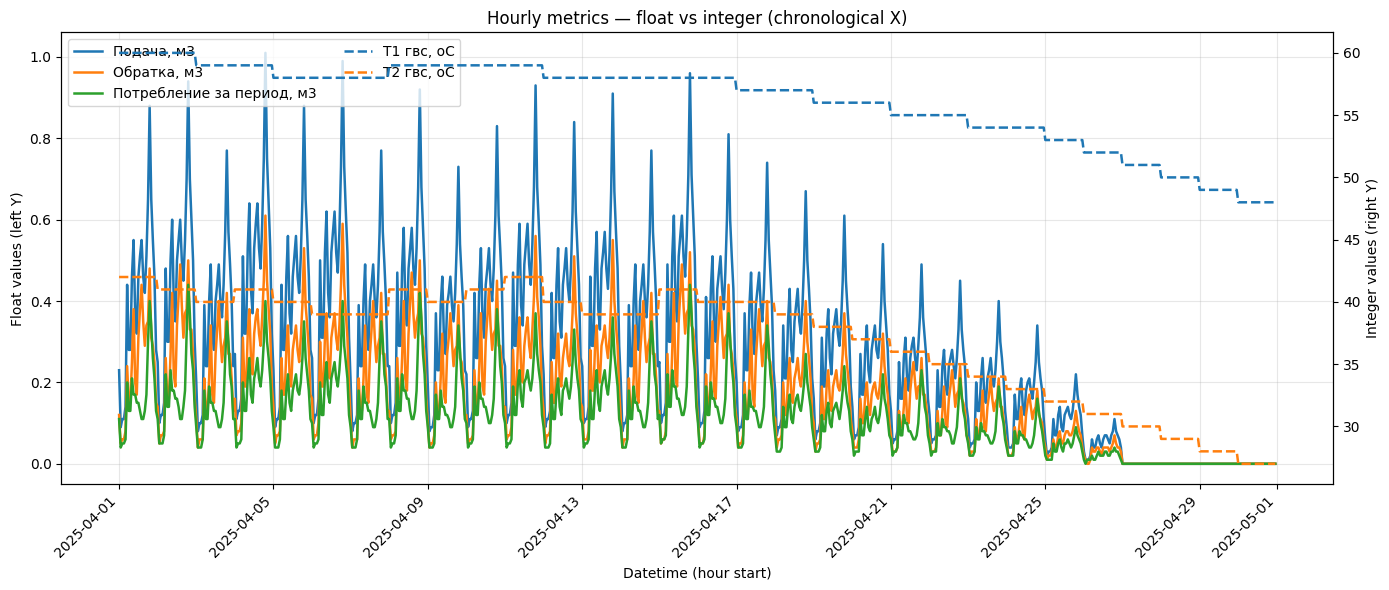

Index levels (df_indexed): ['hour_start', 'date']
Float columns: ['Подача, м3', 'Обратка, м3', 'Потребление за период, м3']
Integer-like columns: ['Т1 гвс, оС', 'Т2 гвс, оС']


In [8]:
# ───────────────────────── Imports ─────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────── Take source DF ─────────────────────────
source_df: pd.DataFrame = dataframes_list[0].copy()

# ───────────────────────── Auto-detect columns ─────────────────────────
date_column: str = next((c for c in source_df.columns if "Дата" in str(c)), source_df.columns[0])
hour_column: str = next((c for c in source_df.columns if "сут" in str(c) or "Время" in str(c)), source_df.columns[1])

# ───────────────────────── Parse date & hour ─────────────────────────
df: pd.DataFrame = source_df.copy()
df["date"] = pd.to_datetime(df[date_column], dayfirst=True, errors="coerce")

# "0-1" -> 0
df["hour_start"] = (
    df[hour_column].astype(str)
    .str.extract(r"^\s*(\d+)")
    .iloc[:, 0]
    .astype(float)
    .astype(int)
)

# datetime for plotting
df["datetime_start"] = df["date"] + pd.to_timedelta(df["hour_start"], unit="h")

# ───────────────────────── Detect numeric columns ─────────────────────────
helper_columns = {date_column, hour_column, "date", "hour_start", "datetime_start"}
candidate_columns = [c for c in df.columns if c not in helper_columns]

float_columns: list[str] = []
int_columns: list[str] = []

for column_name in candidate_columns:
    numeric_series = pd.to_numeric(df[column_name], errors="coerce")
    df[column_name] = numeric_series  # keep numeric version
    non_na = numeric_series.dropna()
    if non_na.empty:
        continue
    # integer-like if values are whole numbers
    if np.isclose(non_na % 1, 0).all():
        int_columns.append(column_name)
    else:
        float_columns.append(column_name)

# ───────────────────────── Set required MultiIndex (hour, date) ─────────────────────────
df_indexed = df.set_index(["hour_start", "date"])  # не сортируем индекс для сохранения структуры

# ───────────────────────── Build time-sorted frame for plotting ─────────────────────────
df_plot = df.sort_values("datetime_start").reset_index(drop=True)

# ───────────────────────── Plot: floats (left Y), integers (right Y) ─────────────────────────
fig, ax_left = plt.subplots(figsize=(14, 6))
ax_right = ax_left.twinx()

# Float series on the left axis
for col in float_columns:
    ax_left.plot(df_plot["datetime_start"], df_plot[col], label=col, linewidth=1.8)

# Integer-like series on the right axis (dashed)
for col in int_columns:
    ax_right.plot(df_plot["datetime_start"], df_plot[col].astype(float), linestyle="--", label=col, linewidth=1.8)

ax_left.set_title("Hourly metrics — float vs integer (chronological X)")
ax_left.set_xlabel("Datetime (hour start)")
ax_left.set_ylabel("Float values (left Y)")
ax_right.set_ylabel("Integer values (right Y)")

plt.setp(ax_left.get_xticklabels(), rotation=45, ha="right")

# Merge legends from both axes
handles_left, labels_left = ax_left.get_legend_handles_labels()
handles_right, labels_right = ax_right.get_legend_handles_labels()
ax_left.legend(handles_left + handles_right, labels_left + labels_right, loc="upper left", ncol=2)

ax_left.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()
# ───────────────────────── Sanity output ─────────────────────────
print("Index levels (df_indexed):", df_indexed.index.names)
print("Float columns:", float_columns)
print("Integer-like columns:", int_columns)


# LR прогноз

### ХВС

Forecasting all series: 100%|██████████| 1/1 [00:00<00:00,  6.33series/s]


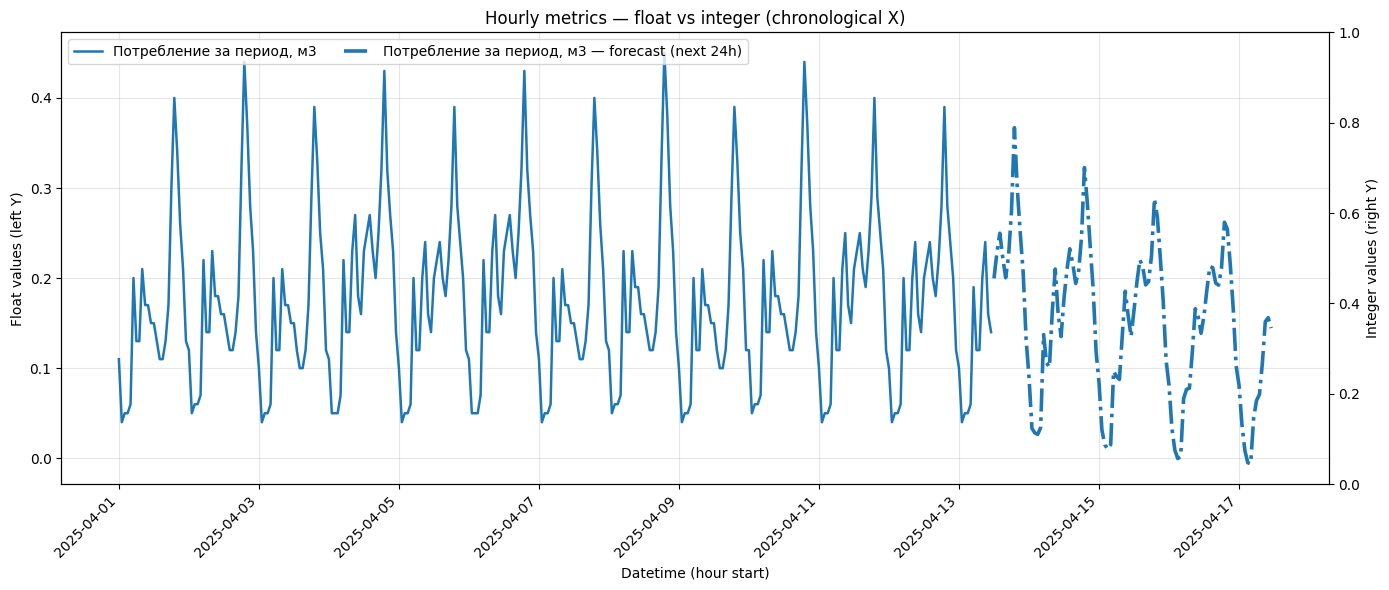

Index levels (df_indexed): ['hour_start', 'date']
Float columns: ['Потребление за период, м3']
Integer-like columns: []
Forecast horizon (hours): 96
Forecast period: 2025-04-13 12:00:00  →  2025-04-17 11:00:00


In [9]:
# ───────────────────────── Imports ─────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sklearn (auto-install if missing)
import sys, subprocess, importlib
try:
    from sklearn.linear_model import LinearRegression
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "scikit-learn"])
    from sklearn.linear_model import LinearRegression

# tqdm (auto-install if missing)
try:
    from tqdm import tqdm
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "tqdm"])
    from tqdm import tqdm

# ───────────────────────── Take source DF ─────────────────────────
source_df: pd.DataFrame = dataframes_list[2].copy()

# ───────────────────────── Auto-detect columns ─────────────────────────
date_column: str = next((c for c in source_df.columns if "Дата" in str(c)), source_df.columns[0])
hour_column: str = next((c for c in source_df.columns if "сут" in str(c) or "Время" in str(c)), source_df.columns[1])

# ───────────────────────── Parse date & hour ─────────────────────────
df: pd.DataFrame = source_df.copy()[:300] #<<<<<<<<<<<< ПОДРЕЗАНА ЧАСТЬ ДАТАСЕТА
df["date"] = pd.to_datetime(df[date_column], dayfirst=True, errors="coerce")

# Normalize hour like "0-1" -> 0, "13:00" -> 13, etc.
df["hour_start"] = (
    df[hour_column].astype(str)
    .str.extract(r"^\s*(\d+)")
    .iloc[:, 0]
    .astype(float)
    .astype(int)
)

# Datetime for plotting
df["datetime_start"] = df["date"] + pd.to_timedelta(df["hour_start"], unit="h")

# ───────────────────────── Detect numeric columns ─────────────────────────
helper_columns = {date_column, hour_column, "date", "hour_start", "datetime_start"}
candidate_columns = [c for c in df.columns if c not in helper_columns]

float_columns: list[str] = []
int_columns: list[str] = []

for column_name in candidate_columns:
    numeric_series = pd.to_numeric(df[column_name], errors="coerce")
    df[column_name] = numeric_series
    non_na = numeric_series.dropna()
    if non_na.empty:
        continue
    if np.isclose(non_na % 1, 0).all():
        int_columns.append(column_name)
    else:
        float_columns.append(column_name)

if not (float_columns or int_columns):
    raise ValueError("No numeric columns found for plotting and forecasting.")

# ───────────────────────── Prepare frames ─────────────────────────
df_indexed = df.set_index(["hour_start", "date"])  # keep structure
df_plot = df.sort_values("datetime_start").reset_index(drop=True)

# ───────────────────────── Plot history ─────────────────────────
fig, ax_left = plt.subplots(figsize=(14, 6))
ax_right = ax_left.twinx()

# Remember plotted line styles/colors to reuse for forecast
series_plot_info: dict[str, dict] = {}

# Float series (solid)
for col in float_columns:
    line = ax_left.plot(df_plot["datetime_start"], df_plot[col], label=col, linewidth=1.8)[0]
    series_plot_info[col] = {
        "axis": ax_left,
        "color": line.get_color(),
        "history_linestyle": line.get_linestyle(),  # usually '-'
    }

# Integer-like series (dashed)
for col in int_columns:
    line = ax_right.plot(df_plot["datetime_start"], df_plot[col].astype(float),
                         linestyle="--", label=col, linewidth=1.8)[0]
    series_plot_info[col] = {
        "axis": ax_right,
        "color": line.get_color(),
        "history_linestyle": line.get_linestyle(),  # '--'
    }

ax_left.set_title("Hourly metrics — float vs integer (chronological X)")
ax_left.set_xlabel("Datetime (hour start)")
ax_left.set_ylabel("Float values (left Y)")
ax_right.set_ylabel("Integer values (right Y)")
plt.setp(ax_left.get_xticklabels(), rotation=45, ha="right")

# ───────────────────────── Helpers for LR forecast ─────────────────────────
def build_time_features(dt_series: pd.Series, values_series: pd.Series) -> pd.DataFrame:
    """Create regression features aligned to dt_series index."""
    features = pd.DataFrame(index=dt_series.index)
    features["time_index"] = np.arange(len(dt_series))
    features["hour_of_day"] = dt_series.dt.hour
    features["day_of_week"] = dt_series.dt.dayofweek
    features["sin_hour"] = np.sin(2 * np.pi * features["hour_of_day"] / 24)
    features["cos_hour"] = np.cos(2 * np.pi * features["hour_of_day"] / 24)
    features["lag_1"] = values_series.shift(1)
    features["lag_24"] = values_series.shift(24)
    features["roll_mean_24"] = values_series.rolling(window=24, min_periods=1).mean()
    return features

def pick_forecast_style(history_linestyle: str) -> dict:
    """Return linestyle/linewidth for forecast given history style."""
    ls = history_linestyle or "-"
    if ls in ("-", "solid"):
        return {"linestyle": "-.", "linewidth": 2.6}
    if ls in ("--", "dashed"):
        return {"linestyle": ":", "linewidth": 2.6}
    # fallback
    return {"linestyle": "-.", "linewidth": 2.6}

# ───────────────────────── Forecast for ALL numeric columns ─────────────────────────
forecast_horizon_hours: int = 24*4 ##<<<<<<<<<<<<< Горищзонт прогноза
datetime_series_full: pd.Series = df_plot["datetime_start"]
last_dt: pd.Timestamp = datetime_series_full.iloc[-1]

all_numeric_columns: list[str] = float_columns + int_columns

for col in tqdm(all_numeric_columns, desc="Forecasting all series", unit="series"):
    values_series: pd.Series = df_plot[col]

    features_full = build_time_features(datetime_series_full, values_series)
    train_mask = features_full[["lag_1", "lag_24"]].notna().all(axis=1) & values_series.notna()

    if train_mask.sum() < 5:
        # слишком мало точек для осмысленной регрессии — пропустим колонку
        continue

    X_train = features_full.loc[train_mask]
    y_train = values_series.loc[train_mask]

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Recursive 24h forecast
    extended_values = values_series.dropna().tolist()
    forecast_datetimes: list[pd.Timestamp] = []
    forecast_values: list[float] = []

    for step in range(1, forecast_horizon_hours + 1):
        future_dt = last_dt + pd.Timedelta(hours=step)
        future_time_index = int(features_full["time_index"].iloc[-1]) + step
        hour_of_day = future_dt.hour
        day_of_week = future_dt.dayofweek
        sin_hour = np.sin(2 * np.pi * hour_of_day / 24)
        cos_hour = np.cos(2 * np.pi * hour_of_day / 24)

        lag_1 = extended_values[-1]
        lag_24 = extended_values[-24] if len(extended_values) >= 24 else lag_1
        roll_mean_24 = np.mean(extended_values[-24:]) if len(extended_values) >= 1 else lag_1

        X_future_row = pd.DataFrame(
            {
                "time_index": [future_time_index],
                "hour_of_day": [hour_of_day],
                "day_of_week": [day_of_week],
                "sin_hour": [sin_hour],
                "cos_hour": [cos_hour],
                "lag_1": [lag_1],
                "lag_24": [lag_24],
                "roll_mean_24": [roll_mean_24],
            }
        )

        y_future_pred = float(model.predict(X_future_row)[0])
        extended_values.append(y_future_pred)
        forecast_datetimes.append(future_dt)
        forecast_values.append(y_future_pred)

    # Plot forecast using SAME color as history, only style/thickness differ
    axis_for_series = series_plot_info[col]["axis"]
    color_for_series = series_plot_info[col]["color"]
    history_ls = series_plot_info[col]["history_linestyle"]
    style_kwargs = pick_forecast_style(history_ls)

    axis_for_series.plot(
        forecast_datetimes,
        forecast_values,
        label=f"{col} — forecast (next 24h)",
        color=color_for_series,
        **style_kwargs,
        zorder=5,
    )

# ───────────────────────── Legend / finalize ─────────────────────────
handles_left, labels_left = ax_left.get_legend_handles_labels()
handles_right, labels_right = ax_right.get_legend_handles_labels()
ax_left.legend(handles_left + handles_right, labels_left + labels_right, loc="upper left", ncol=2)

ax_left.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()

# ───────────────────────── Sanity output ─────────────────────────
print("Index levels (df_indexed):", df_indexed.index.names)
print("Float columns:", float_columns)
print("Integer-like columns:", int_columns)
print(f"Forecast horizon (hours): {forecast_horizon_hours}")
print(f"Forecast period: {last_dt + pd.Timedelta(hours=1)}  →  {last_dt + pd.Timedelta(hours=forecast_horizon_hours)}")


Прогноз сделан пунктирной линией

### ГВС

Forecasting all series: 100%|██████████| 5/5 [00:00<00:00,  6.02series/s]


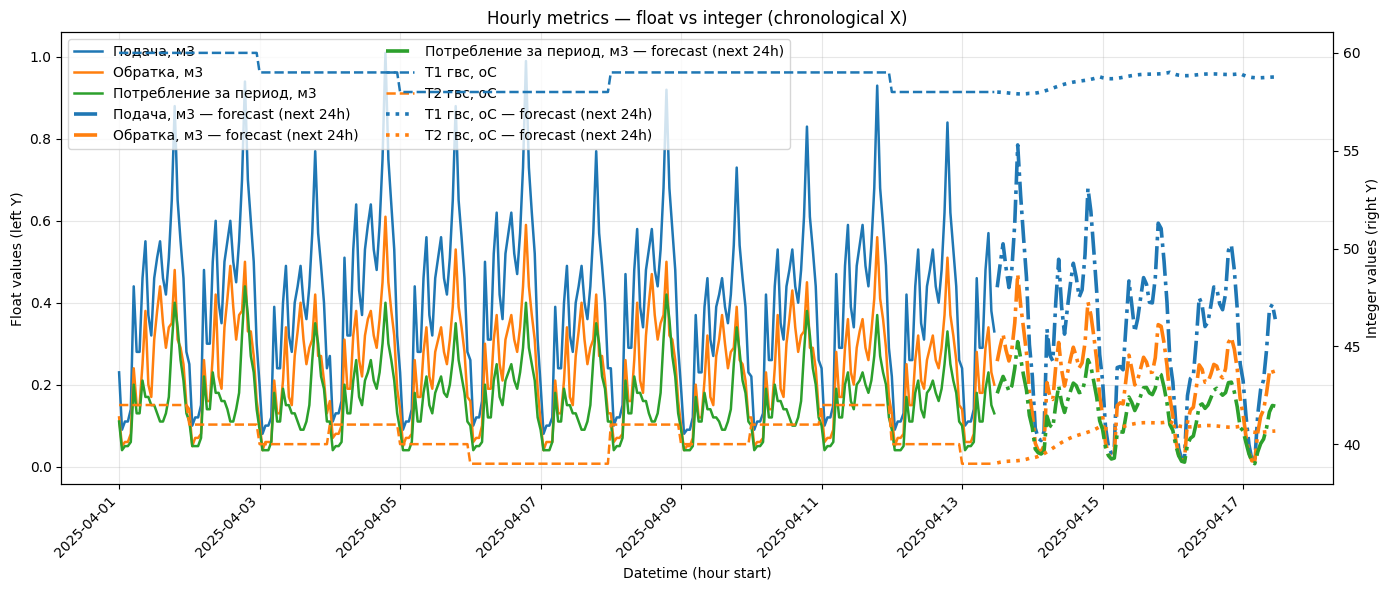

Index levels (df_indexed): ['hour_start', 'date']
Float columns: ['Подача, м3', 'Обратка, м3', 'Потребление за период, м3']
Integer-like columns: ['Т1 гвс, оС', 'Т2 гвс, оС']
Forecast horizon (hours): 96
Forecast period: 2025-04-13 12:00:00  →  2025-04-17 11:00:00


In [10]:
# ───────────────────────── Imports ─────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sklearn (auto-install if missing)
import sys, subprocess, importlib
try:
    from sklearn.linear_model import LinearRegression
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "scikit-learn"])
    from sklearn.linear_model import LinearRegression

# tqdm (auto-install if missing)
try:
    from tqdm import tqdm
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "tqdm"])
    from tqdm import tqdm

# ───────────────────────── Take source DF ─────────────────────────
source_df: pd.DataFrame = dataframes_list[0].copy()

# ───────────────────────── Auto-detect columns ─────────────────────────
date_column: str = next((c for c in source_df.columns if "Дата" in str(c)), source_df.columns[0])
hour_column: str = next((c for c in source_df.columns if "сут" in str(c) or "Время" in str(c)), source_df.columns[1])

# ───────────────────────── Parse date & hour ─────────────────────────
df: pd.DataFrame = source_df.copy()[:300] #<<<<<<<<<<<< ПОДРЕЗАНА ЧАСТЬ ДАТАСЕТА
df["date"] = pd.to_datetime(df[date_column], dayfirst=True, errors="coerce")

# Normalize hour like "0-1" -> 0, "13:00" -> 13, etc.
df["hour_start"] = (
    df[hour_column].astype(str)
    .str.extract(r"^\s*(\d+)")
    .iloc[:, 0]
    .astype(float)
    .astype(int)
)

# Datetime for plotting
df["datetime_start"] = df["date"] + pd.to_timedelta(df["hour_start"], unit="h")

# ───────────────────────── Detect numeric columns ─────────────────────────
helper_columns = {date_column, hour_column, "date", "hour_start", "datetime_start"}
candidate_columns = [c for c in df.columns if c not in helper_columns]

float_columns: list[str] = []
int_columns: list[str] = []

for column_name in candidate_columns:
    numeric_series = pd.to_numeric(df[column_name], errors="coerce")
    df[column_name] = numeric_series
    non_na = numeric_series.dropna()
    if non_na.empty:
        continue
    if np.isclose(non_na % 1, 0).all():
        int_columns.append(column_name)
    else:
        float_columns.append(column_name)

if not (float_columns or int_columns):
    raise ValueError("No numeric columns found for plotting and forecasting.")

# ───────────────────────── Prepare frames ─────────────────────────
df_indexed = df.set_index(["hour_start", "date"])  # keep structure
df_plot = df.sort_values("datetime_start").reset_index(drop=True)

# ───────────────────────── Plot history ─────────────────────────
fig, ax_left = plt.subplots(figsize=(14, 6))
ax_right = ax_left.twinx()

# Remember plotted line styles/colors to reuse for forecast
series_plot_info: dict[str, dict] = {}

# Float series (solid)
for col in float_columns:
    line = ax_left.plot(df_plot["datetime_start"], df_plot[col], label=col, linewidth=1.8)[0]
    series_plot_info[col] = {
        "axis": ax_left,
        "color": line.get_color(),
        "history_linestyle": line.get_linestyle(),  # usually '-'
    }

# Integer-like series (dashed)
for col in int_columns:
    line = ax_right.plot(df_plot["datetime_start"], df_plot[col].astype(float),
                         linestyle="--", label=col, linewidth=1.8)[0]
    series_plot_info[col] = {
        "axis": ax_right,
        "color": line.get_color(),
        "history_linestyle": line.get_linestyle(),  # '--'
    }

ax_left.set_title("Hourly metrics — float vs integer (chronological X)")
ax_left.set_xlabel("Datetime (hour start)")
ax_left.set_ylabel("Float values (left Y)")
ax_right.set_ylabel("Integer values (right Y)")
plt.setp(ax_left.get_xticklabels(), rotation=45, ha="right")

# ───────────────────────── Helpers for LR forecast ─────────────────────────
def build_time_features(dt_series: pd.Series, values_series: pd.Series) -> pd.DataFrame:
    """Create regression features aligned to dt_series index."""
    features = pd.DataFrame(index=dt_series.index)
    features["time_index"] = np.arange(len(dt_series))
    features["hour_of_day"] = dt_series.dt.hour
    features["day_of_week"] = dt_series.dt.dayofweek
    features["sin_hour"] = np.sin(2 * np.pi * features["hour_of_day"] / 24)
    features["cos_hour"] = np.cos(2 * np.pi * features["hour_of_day"] / 24)
    features["lag_1"] = values_series.shift(1)
    features["lag_24"] = values_series.shift(24)
    features["roll_mean_24"] = values_series.rolling(window=24, min_periods=1).mean()
    return features

def pick_forecast_style(history_linestyle: str) -> dict:
    """Return linestyle/linewidth for forecast given history style."""
    ls = history_linestyle or "-"
    if ls in ("-", "solid"):
        return {"linestyle": "-.", "linewidth": 2.6}
    if ls in ("--", "dashed"):
        return {"linestyle": ":", "linewidth": 2.6}
    # fallback
    return {"linestyle": "-.", "linewidth": 2.6}

# ───────────────────────── Forecast for ALL numeric columns ─────────────────────────
forecast_horizon_hours: int = 24*4 ##<<<<<<<<<<<<< Горищзонт прогноза
datetime_series_full: pd.Series = df_plot["datetime_start"]
last_dt: pd.Timestamp = datetime_series_full.iloc[-1]

all_numeric_columns: list[str] = float_columns + int_columns

for col in tqdm(all_numeric_columns, desc="Forecasting all series", unit="series"):
    values_series: pd.Series = df_plot[col]

    features_full = build_time_features(datetime_series_full, values_series)
    train_mask = features_full[["lag_1", "lag_24"]].notna().all(axis=1) & values_series.notna()

    if train_mask.sum() < 5:
        # слишком мало точек для осмысленной регрессии — пропустим колонку
        continue

    X_train = features_full.loc[train_mask]
    y_train = values_series.loc[train_mask]

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Recursive 24h forecast
    extended_values = values_series.dropna().tolist()
    forecast_datetimes: list[pd.Timestamp] = []
    forecast_values: list[float] = []

    for step in range(1, forecast_horizon_hours + 1):
        future_dt = last_dt + pd.Timedelta(hours=step)
        future_time_index = int(features_full["time_index"].iloc[-1]) + step
        hour_of_day = future_dt.hour
        day_of_week = future_dt.dayofweek
        sin_hour = np.sin(2 * np.pi * hour_of_day / 24)
        cos_hour = np.cos(2 * np.pi * hour_of_day / 24)

        lag_1 = extended_values[-1]
        lag_24 = extended_values[-24] if len(extended_values) >= 24 else lag_1
        roll_mean_24 = np.mean(extended_values[-24:]) if len(extended_values) >= 1 else lag_1

        X_future_row = pd.DataFrame(
            {
                "time_index": [future_time_index],
                "hour_of_day": [hour_of_day],
                "day_of_week": [day_of_week],
                "sin_hour": [sin_hour],
                "cos_hour": [cos_hour],
                "lag_1": [lag_1],
                "lag_24": [lag_24],
                "roll_mean_24": [roll_mean_24],
            }
        )

        y_future_pred = float(model.predict(X_future_row)[0])
        extended_values.append(y_future_pred)
        forecast_datetimes.append(future_dt)
        forecast_values.append(y_future_pred)

    # Plot forecast using SAME color as history, only style/thickness differ
    axis_for_series = series_plot_info[col]["axis"]
    color_for_series = series_plot_info[col]["color"]
    history_ls = series_plot_info[col]["history_linestyle"]
    style_kwargs = pick_forecast_style(history_ls)

    axis_for_series.plot(
        forecast_datetimes,
        forecast_values,
        label=f"{col} — forecast (next 24h)",
        color=color_for_series,
        **style_kwargs,
        zorder=5,
    )

# ───────────────────────── Legend / finalize ─────────────────────────
handles_left, labels_left = ax_left.get_legend_handles_labels()
handles_right, labels_right = ax_right.get_legend_handles_labels()
ax_left.legend(handles_left + handles_right, labels_left + labels_right, loc="upper left", ncol=2)

ax_left.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()

# ───────────────────────── Sanity output ─────────────────────────
print("Index levels (df_indexed):", df_indexed.index.names)
print("Float columns:", float_columns)
print("Integer-like columns:", int_columns)
print(f"Forecast horizon (hours): {forecast_horizon_hours}")
print(f"Forecast period: {last_dt + pd.Timedelta(hours=1)}  →  {last_dt + pd.Timedelta(hours=forecast_horizon_hours)}")


# SARIMA сезонное моделирование

### SARIMA прогноз

Прогноз на базе системной модели

Detected date column: Дата
Detected hour column: Время суток, ч
Target column (first float): Подача, м3
Series length: 720, span: 2025-04-01 00:00:00 → 2025-04-30 23:00:00


Fast SARIMA pipeline:   0%|          | 0/6 [00:00<?, ?it/s]

Using order=(1, 1, 1), seasonal_order=(1, 1, 1, 24)
Test metrics: {'MAE': 0.095905, 'RMSE': np.float64(0.122516), 'MAPE_%': np.float64(7013615647.498091)}


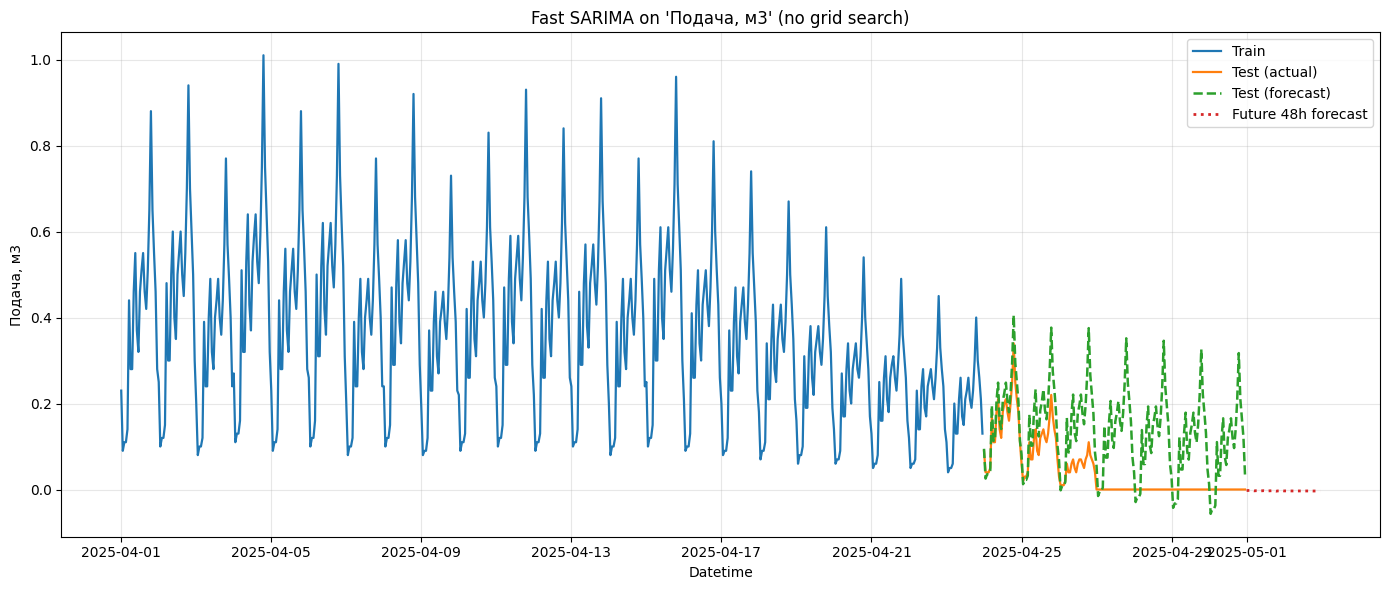

In [11]:
# ───────────────────────── Fast SARIMA (first float) + tqdm, no grid search ─────────────────────────
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tqdm.auto import tqdm

# ───────────────────────── Helpers ─────────────────────────
def detect_date_and_hour_columns(df: pd.DataFrame) -> tuple[str, str]:
    date_col = next((c for c in df.columns if "Дата" in str(c)), df.columns[0])
    hour_col = next((c for c in df.columns if "сут" in str(c) or "Время" in str(c)), df.columns[1])
    return date_col, hour_col

def get_first_float_column(df: pd.DataFrame, exclude: set[str]) -> str:
    """Return the first non-integer-like numeric column (fallback to first numeric)."""
    for col in df.columns:
        if col in exclude:
            continue
        series = pd.to_numeric(df[col], errors="coerce")
        if series.notna().any():
            non_na = series.dropna()
            if not np.isclose(non_na % 1, 0).all():  # not integer-like → treat as float metric
                return col
    # fallback: first numeric at all
    for col in df.columns:
        if col in exclude:
            continue
        if pd.to_numeric(df[col], errors="coerce").notna().any():
            return col
    raise ValueError("No numeric columns found for SARIMA target.")

def build_hourly_series(df_raw: pd.DataFrame, date_col: str, hour_col: str, target_col: str) -> pd.Series:
    df = df_raw.copy()
    df["date"] = pd.to_datetime(df[date_col], dayfirst=True, errors="coerce")
    df["hour_start"] = (
        df[hour_col].astype(str).str.extract(r"^\s*(\d+)").iloc[:, 0].astype(float).astype(int)
    )
    df["datetime_start"] = df["date"] + pd.to_timedelta(df["hour_start"], unit="h")
    df[target_col] = pd.to_numeric(df[target_col], errors="coerce")
    ts = (
        df.sort_values("datetime_start")
          .set_index("datetime_start")[target_col]
          .asfreq("H")
          .interpolate(method="time").bfill().ffill()
    )
    return ts

def infer_d_adf(ts: pd.Series, max_d: int = 2, alpha: float = 0.05) -> int:
    """Infer non-seasonal differencing d via ADF; fallback to 1."""
    for d in range(max_d + 1):
        series = ts.diff(d).dropna() if d > 0 else ts
        try:
            pval = adfuller(series, autolag="AIC")[1]
        except Exception:
            continue
        if pval < alpha:
            return d
    return 1

def infer_D_adf(ts: pd.Series, season: int = 24, max_D: int = 1, alpha: float = 0.05) -> int:
    """Infer seasonal differencing D via ADF on seasonally differenced series; fallback to 1."""
    for D in range(max_D + 1):
        series = ts.diff(season * D).dropna() if D > 0 else ts
        try:
            pval = adfuller(series, autolag="AIC")[1]
        except Exception:
            continue
        if pval < alpha:
            return D
    return 1

def compute_metrics(y_true: pd.Series, y_pred: pd.Series) -> dict:
    mae = mean_absolute_error(y_true, y_pred)
    # ⚠️ No 'squared' kw: compute RMSE manually
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = (np.abs((y_true - y_pred) / np.clip(np.abs(y_true), 1e-9, None))).mean() * 100
    return {"MAE": mae, "RMSE": rmse, "MAPE_%": mape}

# ───────────────────────── Data prep ─────────────────────────
df_source: pd.DataFrame = dataframes_list[0].copy()
date_col, hour_col = detect_date_and_hour_columns(df_source)
target_col: str = get_first_float_column(df_source, exclude={date_col, hour_col})
ts: pd.Series = build_hourly_series(df_source, date_col, hour_col, target_col)

print(f"Detected date column: {date_col}")
print(f"Detected hour column: {hour_col}")
print(f"Target column (first float): {target_col}")
print(f"Series length: {len(ts)}, span: {ts.index.min()} → {ts.index.max()}")

# ───────────────────────── Split ─────────────────────────
test_hours: int = 24 * 7
split_idx: int = max(len(ts) - test_hours, int(len(ts) * 0.7))
y_train, y_test = ts.iloc[:split_idx], ts.iloc[split_idx:]

# ───────────────────────── Fast SARIMA with tqdm over steps ─────────────────────────
total_steps: int = 6  # d, D, fit(train), forecast(test), fit(full), forecast(future)
with tqdm(total=total_steps, desc="Fast SARIMA pipeline") as pbar:
    seasonal_period: int = 24
    d_auto: int = infer_d_adf(y_train, max_d=2, alpha=0.05); pbar.update(1)
    D_auto: int = infer_D_adf(y_train, season=seasonal_period, max_D=1, alpha=0.05); pbar.update(1)

    order = (1, d_auto, 1)
    seasonal_order = (1, D_auto, 1, seasonal_period)
    print(f"Using order={order}, seasonal_order={seasonal_order}")

    model = SARIMAX(
        y_train,
        order=order,
        seasonal_order=seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=False,
    )
    result = model.fit(disp=False, method="lbfgs", maxiter=300); pbar.update(1)

    y_pred_test = result.get_forecast(steps=len(y_test)).predicted_mean
    y_pred_test.index = y_test.index; pbar.update(1)

    model_full = SARIMAX(
        ts,
        order=order,
        seasonal_order=seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=False,
    ).fit(disp=False, method="lbfgs", maxiter=300); pbar.update(1)

    future_horizon_hours: int = 48
    y_future = model_full.get_forecast(steps=future_horizon_hours).predicted_mean; pbar.update(1)

# ───────────────────────── Metrics & Plot ─────────────────────────
metrics = compute_metrics(y_test, y_pred_test)
print("Test metrics:", {k: round(v, 6) for k, v in metrics.items()})

plt.figure(figsize=(14, 6))
plt.plot(y_train.index, y_train.values, label="Train", linewidth=1.6)
plt.plot(y_test.index, y_test.values, label="Test (actual)", linewidth=1.6)
plt.plot(y_pred_test.index, y_pred_test.values, label="Test (forecast)", linestyle="--", linewidth=1.8)
plt.plot(y_future.index, y_future.values, label="Future 48h forecast", linestyle=":", linewidth=2.0)
plt.title(f"Fast SARIMA on '{target_col}' (no grid search)")
plt.xlabel("Datetime")
plt.ylabel(target_col)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



=== Components head() ===
                     observed     trend  seasonal_24h  seasonally_adjusted  \
datetime_start                                                               
2025-04-01 00:00:00      0.23  0.399926     -0.168951             0.398951   
2025-04-01 01:00:00      0.09  0.400497     -0.311303             0.401303   
2025-04-01 02:00:00      0.11  0.401069     -0.291763             0.401763   
2025-04-01 03:00:00      0.11  0.401642     -0.292296             0.402296   
2025-04-01 04:00:00      0.14  0.402216     -0.264498             0.404498   
2025-04-01 05:00:00      0.44  0.402790      0.036881             0.403119   
2025-04-01 06:00:00      0.28  0.403366     -0.122312             0.402312   
2025-04-01 07:00:00      0.28  0.403942     -0.122388             0.402388   
2025-04-01 08:00:00      0.46  0.404518      0.055136             0.404864   
2025-04-01 09:00:00      0.55  0.405095      0.144553             0.405447   

                        resid  fitte

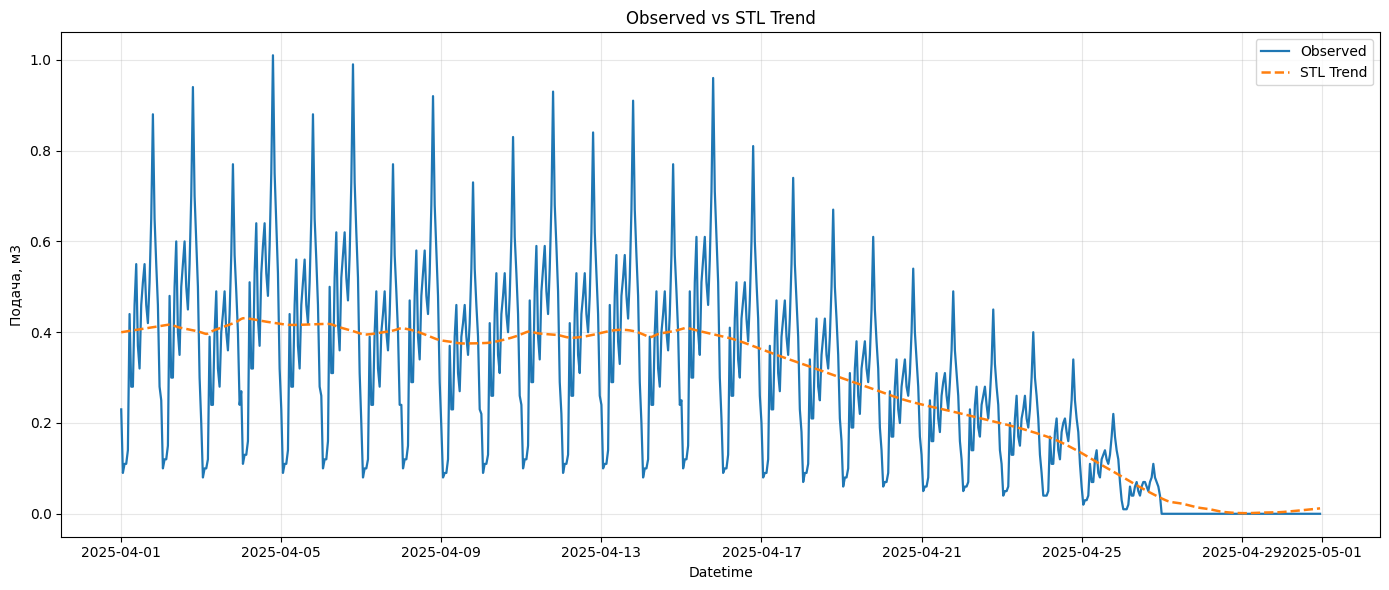

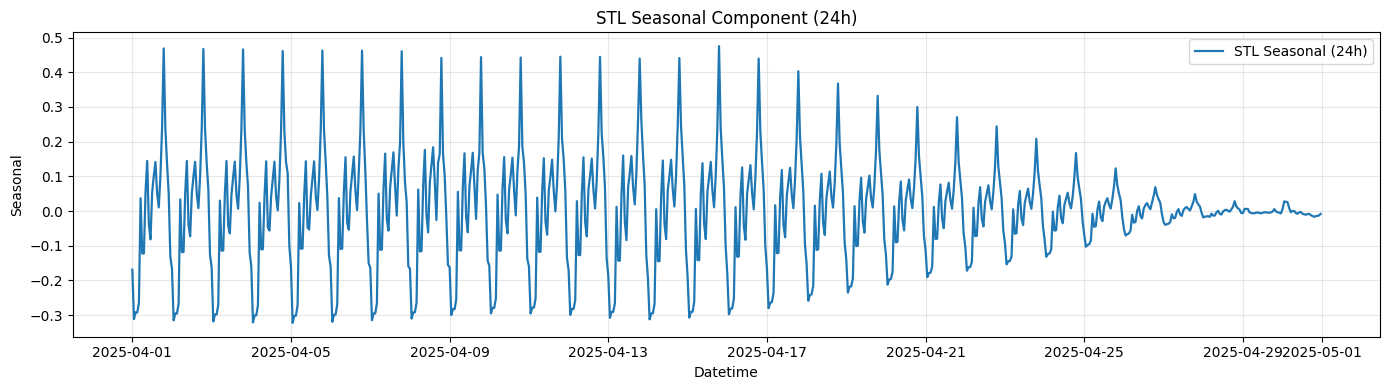

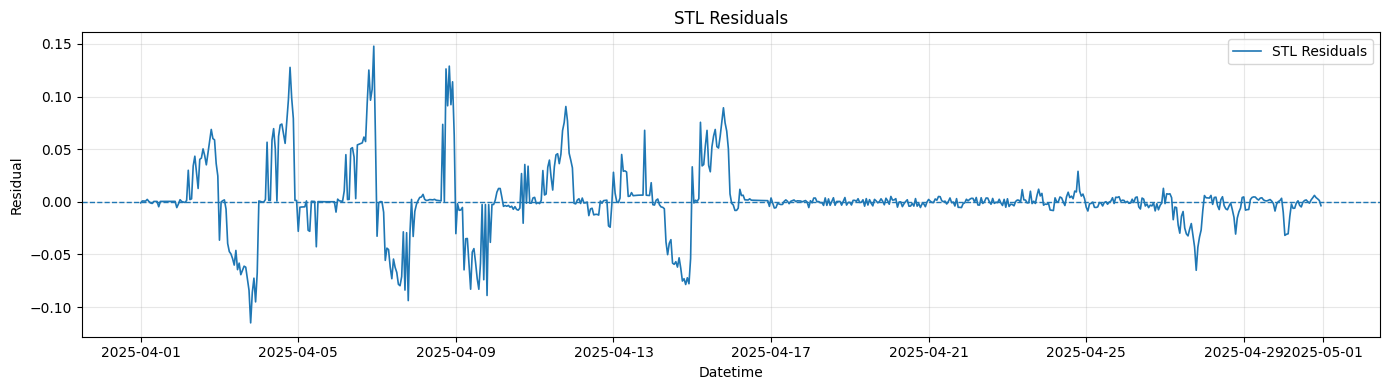

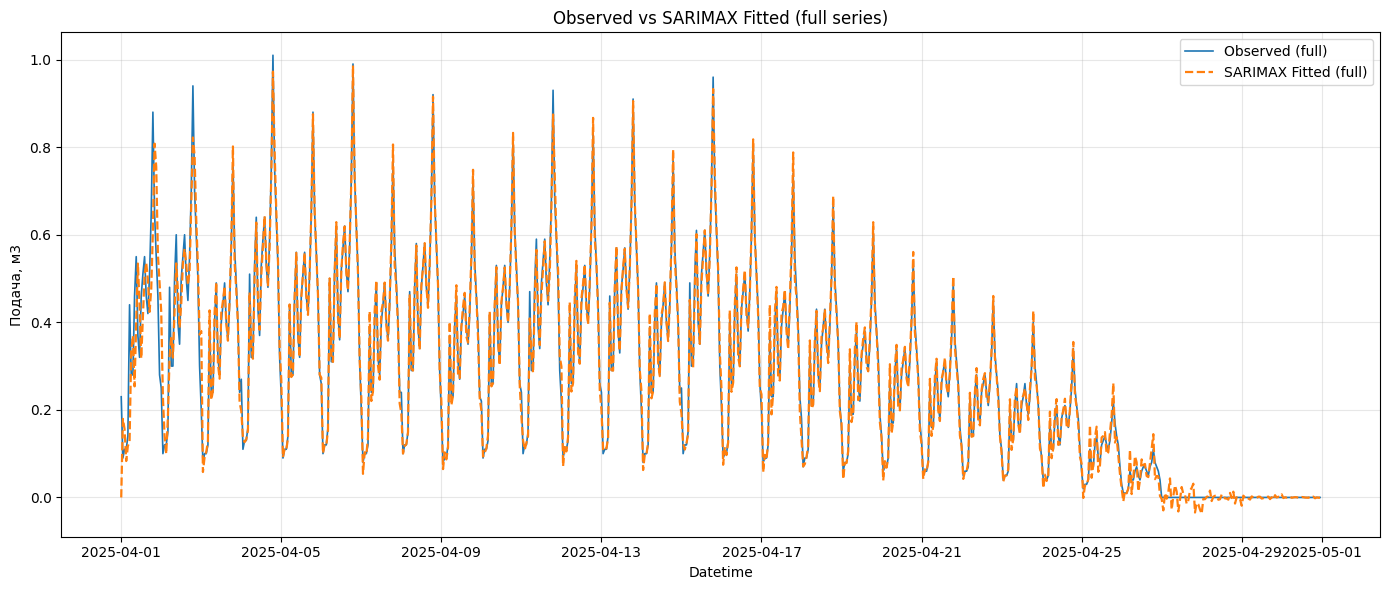

Train in-sample metrics: {'MAE': 0.019286, 'RMSE': np.float64(0.038582), 'MAPE_%': np.float64(6.571295)}


In [12]:
# ───────────────────────── Components extraction (STL + SARIMAX internals) ─────────────────────────
from statsmodels.tsa.seasonal import STL

# 1) STL decomposition (trend / seasonal / resid) on the full hourly series
stl_period_hours: int = 24  # daily seasonality in hourly data
stl_result = STL(ts, period=stl_period_hours, robust=True).fit()

stl_trend: pd.Series = stl_result.trend.rename("trend")
stl_seasonal: pd.Series = stl_result.seasonal.rename(f"seasonal_{stl_period_hours}h")
stl_resid: pd.Series = stl_result.resid.rename("resid")
seasonally_adjusted: pd.Series = (ts - stl_seasonal).rename("seasonally_adjusted")

# 2) In-sample fitted values and residuals from SARIMAX
#    (а) для train: одновременное предсказание "один-шаг-вперёд" и остатки
in_sample_pred_train = result.get_prediction(
    start=y_train.index[0],
    end=y_train.index[-1],
).predicted_mean.rename("fitted_train")

residuals_train: pd.Series = (y_train - in_sample_pred_train).rename("residuals_train")

#    (б) для full-серии от model_full: fitted values по всей длине ряда
#        Примечание: у SARIMAX fittedvalues имеет тот же индекс, что и обучающие данные,
#        но может иметь NaN в начале из-за инициализации.
fitted_full: pd.Series = model_full.fittedvalues.rename("fitted_full")
residuals_full: pd.Series = (ts - fitted_full).rename("residuals_full")

# 3) Pack everything into a single DataFrame (aligned by index)
components_df: pd.DataFrame = pd.concat(
    [
        ts.rename("observed"),
        stl_trend,
        stl_seasonal,
        seasonally_adjusted,
        stl_resid,
        fitted_full,
        residuals_full,
    ],
    axis=1
)

# 4) Quick diagnostics printout
print("\n=== Components head() ===")
print(components_df.head(10))

print("\n=== Train in-sample forecast vs actuals (last 10) ===")
in_sample_compare = pd.DataFrame(
    {
        "actual_train": y_train,
        "fitted_train": in_sample_pred_train.reindex(y_train.index),
        "residuals_train": residuals_train.reindex(y_train.index),
    }
)
print(in_sample_compare.tail(10))

# 5) Optional: plots for components
plt.figure(figsize=(14, 6))
plt.plot(ts.index, ts.values, label="Observed", linewidth=1.6)
plt.plot(stl_trend.index, stl_trend.values, label="STL Trend", linestyle="--", linewidth=1.8)
plt.title("Observed vs STL Trend")
plt.xlabel("Datetime")
plt.ylabel(target_col)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(stl_seasonal.index, stl_seasonal.values, label=f"STL Seasonal ({stl_period_hours}h)", linewidth=1.6)
plt.title(f"STL Seasonal Component ({stl_period_hours}h)")
plt.xlabel("Datetime")
plt.ylabel("Seasonal")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(stl_resid.index, stl_resid.values, label="STL Residuals", linewidth=1.2)
plt.axhline(0.0, linestyle="--", linewidth=1.0)
plt.title("STL Residuals")
plt.xlabel("Datetime")
plt.ylabel("Residual")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(ts.index, ts.values, label="Observed (full)", linewidth=1.2)
plt.plot(fitted_full.index, fitted_full.values, label="SARIMAX Fitted (full)", linestyle="--", linewidth=1.6)
plt.title("Observed vs SARIMAX Fitted (full series)")
plt.xlabel("Datetime")
plt.ylabel(target_col)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 6) (Опционально) метрики по train in-sample качеству
train_metrics = compute_metrics(
    y_true=in_sample_compare["actual_train"].dropna(),
    y_pred=in_sample_compare["fitted_train"].dropna().reindex(in_sample_compare.index)
)
print("Train in-sample metrics:", {k: round(v, 6) for k, v in train_metrics.items()})


### SARIMA извлечение трендов и периодичности


=== Components head() ===
                     observed     trend  seasonal_24h  seasonally_adjusted  \
datetime_start                                                               
2025-04-01 00:00:00      0.23  0.399926     -0.168951             0.398951   
2025-04-01 01:00:00      0.09  0.400497     -0.311303             0.401303   
2025-04-01 02:00:00      0.11  0.401069     -0.291763             0.401763   
2025-04-01 03:00:00      0.11  0.401642     -0.292296             0.402296   
2025-04-01 04:00:00      0.14  0.402216     -0.264498             0.404498   
2025-04-01 05:00:00      0.44  0.402790      0.036881             0.403119   
2025-04-01 06:00:00      0.28  0.403366     -0.122312             0.402312   
2025-04-01 07:00:00      0.28  0.403942     -0.122388             0.402388   
2025-04-01 08:00:00      0.46  0.404518      0.055136             0.404864   
2025-04-01 09:00:00      0.55  0.405095      0.144553             0.405447   

                        resid  fitte

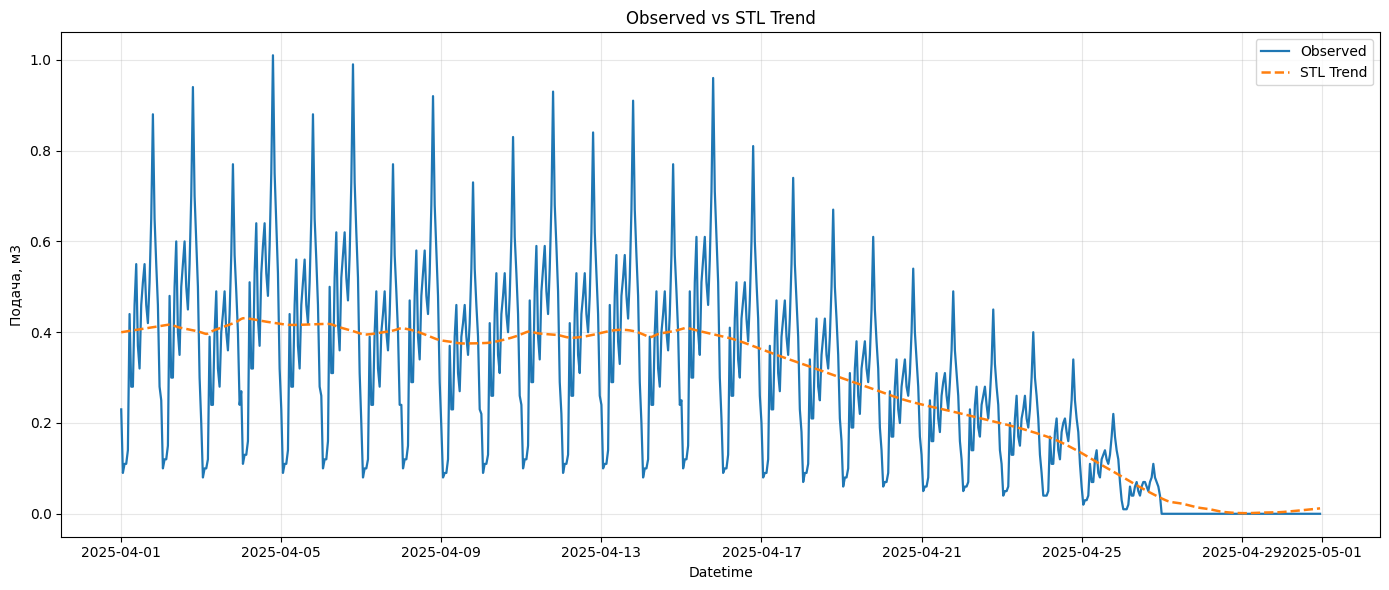

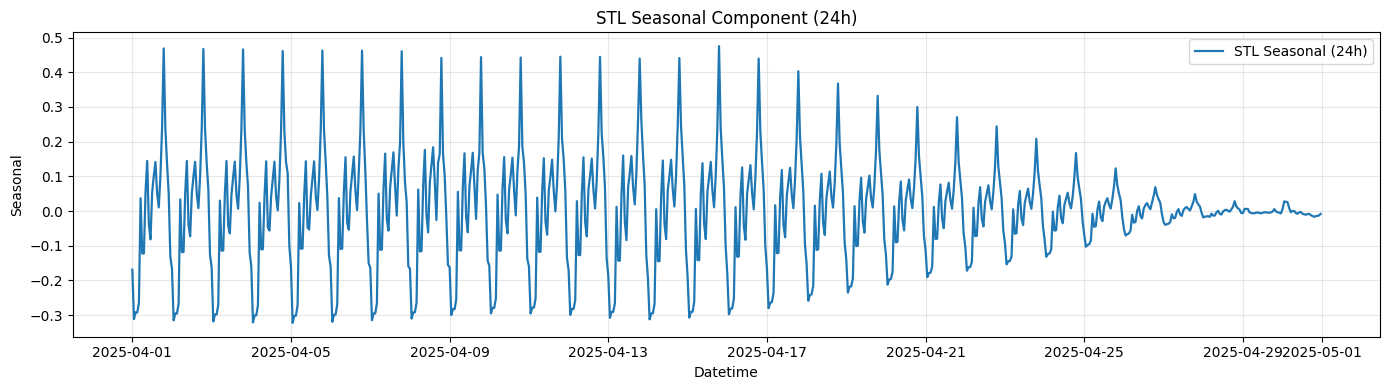

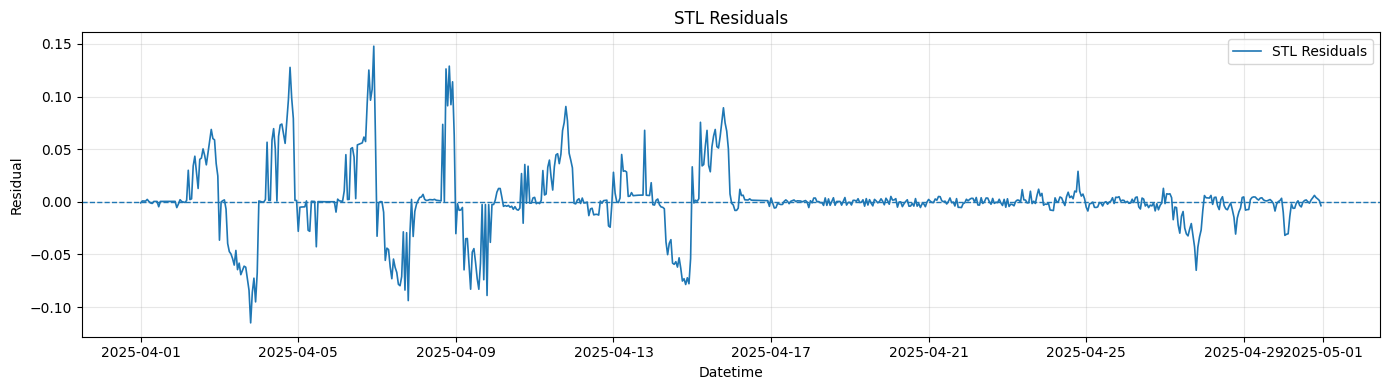

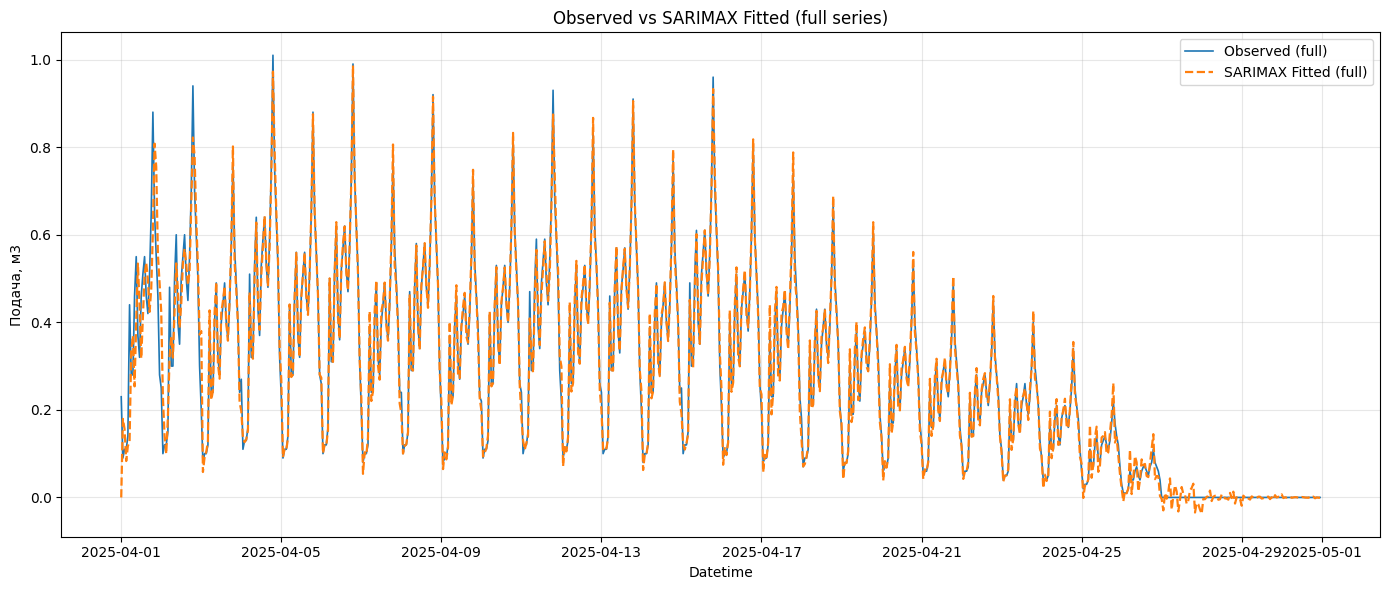

Train in-sample metrics: {'MAE': 0.019286, 'RMSE': np.float64(0.038582), 'MAPE_%': np.float64(6.571295)}


In [13]:
# ───────────────────────── Components extraction (STL + SARIMAX internals) ─────────────────────────
from statsmodels.tsa.seasonal import STL

# 1) STL decomposition (trend / seasonal / resid) on the full hourly series
stl_period_hours: int = 24  # daily seasonality in hourly data
stl_result = STL(ts, period=stl_period_hours, robust=True).fit()

stl_trend: pd.Series = stl_result.trend.rename("trend")
stl_seasonal: pd.Series = stl_result.seasonal.rename(f"seasonal_{stl_period_hours}h")
stl_resid: pd.Series = stl_result.resid.rename("resid")
seasonally_adjusted: pd.Series = (ts - stl_seasonal).rename("seasonally_adjusted")

# 2) In-sample fitted values and residuals from SARIMAX
#    (а) для train: одновременное предсказание "один-шаг-вперёд" и остатки
in_sample_pred_train = result.get_prediction(
    start=y_train.index[0],
    end=y_train.index[-1],
).predicted_mean.rename("fitted_train")

residuals_train: pd.Series = (y_train - in_sample_pred_train).rename("residuals_train")

#    (б) для full-серии от model_full: fitted values по всей длине ряда
#        Примечание: у SARIMAX fittedvalues имеет тот же индекс, что и обучающие данные,
#        но может иметь NaN в начале из-за инициализации.
fitted_full: pd.Series = model_full.fittedvalues.rename("fitted_full")
residuals_full: pd.Series = (ts - fitted_full).rename("residuals_full")

# 3) Pack everything into a single DataFrame (aligned by index)
components_df: pd.DataFrame = pd.concat(
    [
        ts.rename("observed"),
        stl_trend,
        stl_seasonal,
        seasonally_adjusted,
        stl_resid,
        fitted_full,
        residuals_full,
    ],
    axis=1
)

# 4) Quick diagnostics printout
print("\n=== Components head() ===")
print(components_df.head(10))

print("\n=== Train in-sample forecast vs actuals (last 10) ===")
in_sample_compare = pd.DataFrame(
    {
        "actual_train": y_train,
        "fitted_train": in_sample_pred_train.reindex(y_train.index),
        "residuals_train": residuals_train.reindex(y_train.index),
    }
)
print(in_sample_compare.tail(10))

# 5) Optional: plots for components
plt.figure(figsize=(14, 6))
plt.plot(ts.index, ts.values, label="Observed", linewidth=1.6)
plt.plot(stl_trend.index, stl_trend.values, label="STL Trend", linestyle="--", linewidth=1.8)
plt.title("Observed vs STL Trend")
plt.xlabel("Datetime")
plt.ylabel(target_col)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(stl_seasonal.index, stl_seasonal.values, label=f"STL Seasonal ({stl_period_hours}h)", linewidth=1.6)
plt.title(f"STL Seasonal Component ({stl_period_hours}h)")
plt.xlabel("Datetime")
plt.ylabel("Seasonal")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(stl_resid.index, stl_resid.values, label="STL Residuals", linewidth=1.2)
plt.axhline(0.0, linestyle="--", linewidth=1.0)
plt.title("STL Residuals")
plt.xlabel("Datetime")
plt.ylabel("Residual")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(ts.index, ts.values, label="Observed (full)", linewidth=1.2)
plt.plot(fitted_full.index, fitted_full.values, label="SARIMAX Fitted (full)", linestyle="--", linewidth=1.6)
plt.title("Observed vs SARIMAX Fitted (full series)")
plt.xlabel("Datetime")
plt.ylabel(target_col)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 6) (Опционально) метрики по train in-sample качеству
train_metrics = compute_metrics(
    y_true=in_sample_compare["actual_train"].dropna(),
    y_pred=in_sample_compare["fitted_train"].dropna().reindex(in_sample_compare.index)
)
print("Train in-sample metrics:", {k: round(v, 6) for k, v in train_metrics.items()})


# Аналитика внутри дня

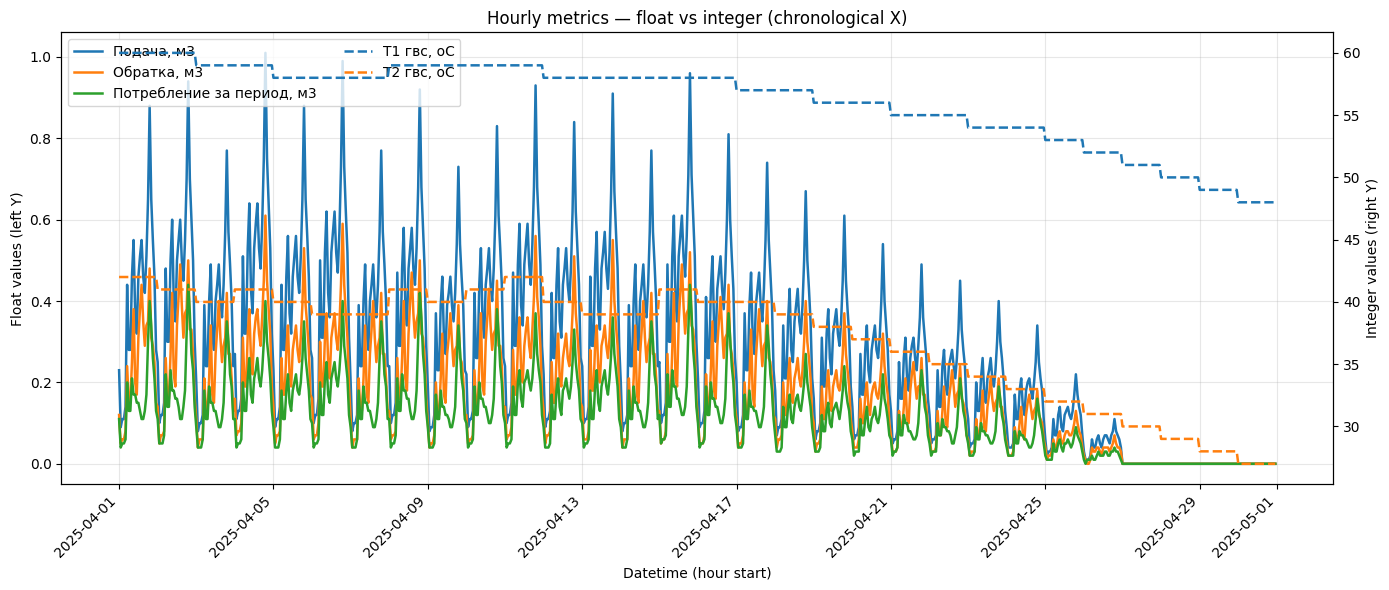

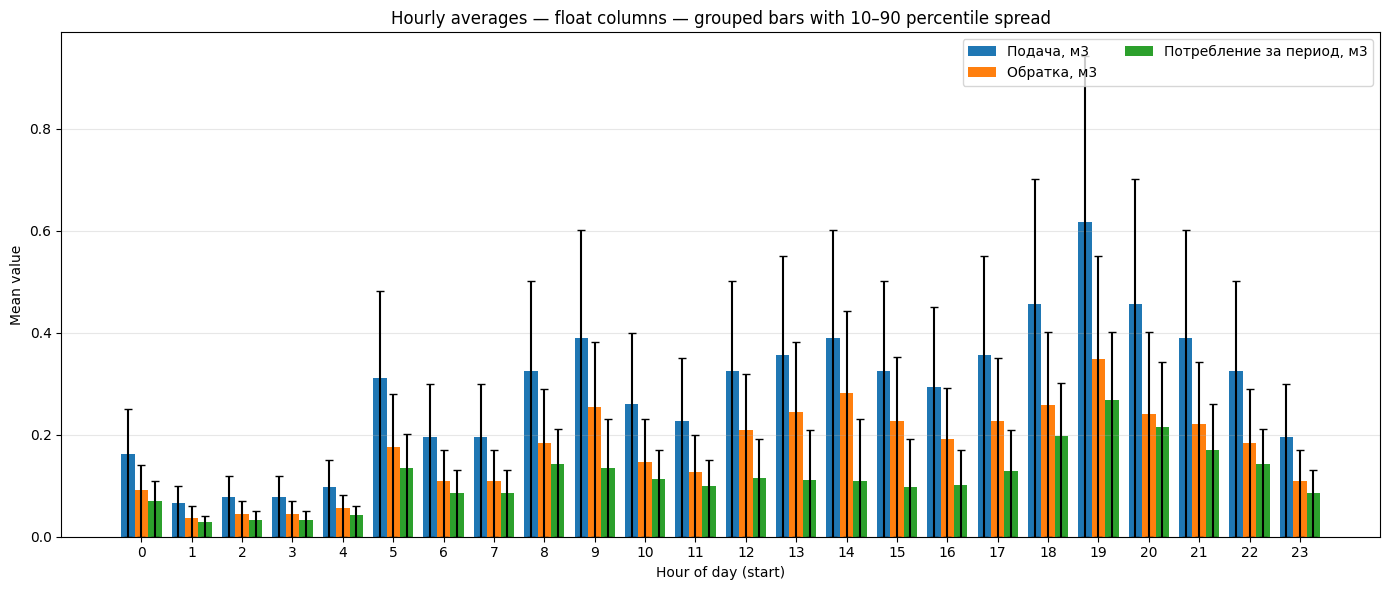

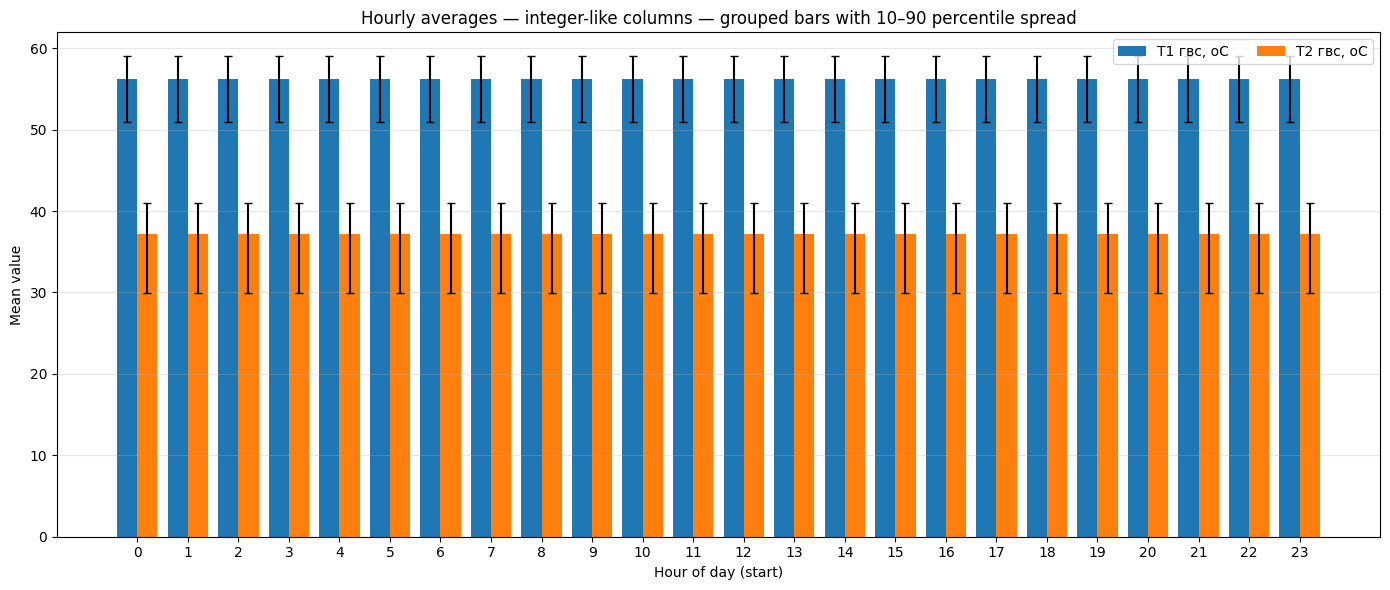

Index levels (df_indexed): ['hour_start', 'date']
Float columns: ['Подача, м3', 'Обратка, м3', 'Потребление за период, м3']
Integer-like columns: ['Т1 гвс, оС', 'Т2 гвс, оС']

Hourly mean (first rows):


,"Подача, м3","Обратка, м3","Потребление за период, м3","Т1 гвс, оС","Т2 гвс, оС"
hour_start,,,,,
0,0.162333,0.092000,0.070333,56.166667,37.133333
1,0.065333,0.036333,0.029000,56.166667,37.133333
2,0.078333,0.045000,0.033333,56.166667,37.133333
3,0.078333,0.045000,0.033333,56.166667,37.133333
4,0.098333,0.056000,0.042333,56.166667,37.133333


In [14]:
# ───────────────────────── Imports ─────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────── Take source DF ─────────────────────────
source_df: pd.DataFrame = dataframes_list[0].copy()

# ───────────────────────── Auto-detect columns ─────────────────────────
date_column: str = next((c for c in source_df.columns if "Дата" in str(c)), source_df.columns[0])
hour_column: str = next((c for c in source_df.columns if "сут" in str(c) or "Время" in str(c)), source_df.columns[1])

# ───────────────────────── Parse date & hour ─────────────────────────
df: pd.DataFrame = source_df.copy()
df["date"] = pd.to_datetime(df[date_column], dayfirst=True, errors="coerce")

# "0-1" -> 0
df["hour_start"] = (
    df[hour_column].astype(str)
    .str.extract(r"^\s*(\d+)")
    .iloc[:, 0]
    .astype(float)
    .astype(int)
)

# datetime for plotting
df["datetime_start"] = df["date"] + pd.to_timedelta(df["hour_start"], unit="h")

# ───────────────────────── Detect numeric columns ─────────────────────────
helper_columns = {date_column, hour_column, "date", "hour_start", "datetime_start"}
candidate_columns = [c for c in df.columns if c not in helper_columns]

float_columns: list[str] = []
int_columns: list[str] = []

for column_name in candidate_columns:
    numeric_series = pd.to_numeric(df[column_name], errors="coerce")
    df[column_name] = numeric_series  # keep numeric version
    non_na = numeric_series.dropna()
    if non_na.empty:
        continue
    # integer-like if values are whole numbers
    if np.isclose(non_na % 1, 0).all():
        int_columns.append(column_name)
    else:
        float_columns.append(column_name)

# ───────────────────────── Set required MultiIndex (hour, date) ─────────────────────────
df_indexed = df.set_index(["hour_start", "date"])  # keep original structure (no sort)

# ───────────────────────── Build time-sorted frame for plotting ─────────────────────────
df_plot = df.sort_values("datetime_start").reset_index(drop=True)

# ───────────────────────── Plot 1: floats (left Y), integers (right Y) ─────────────────────────
fig, ax_left = plt.subplots(figsize=(14, 6))
ax_right = ax_left.twinx()

# Float series on the left axis
for col in float_columns:
    ax_left.plot(df_plot["datetime_start"], df_plot[col], label=col, linewidth=1.8)

# Integer-like series on the right axis (dashed)
for col in int_columns:
    ax_right.plot(df_plot["datetime_start"], df_plot[col].astype(float), linestyle="--", label=col, linewidth=1.8)

ax_left.set_title("Hourly metrics — float vs integer (chronological X)")
ax_left.set_xlabel("Datetime (hour start)")
ax_left.set_ylabel("Float values (left Y)")
ax_right.set_ylabel("Integer values (right Y)")

plt.setp(ax_left.get_xticklabels(), rotation=45, ha="right")

# Merge legends from both axes
handles_left, labels_left = ax_left.get_legend_handles_labels()
handles_right, labels_right = ax_right.get_legend_handles_labels()
ax_left.legend(handles_left + handles_right, labels_left + labels_right, loc="upper left", ncol=2)

ax_left.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()

# ───────────────────────── Plot 2: Hour-of-day means — bars with spread ─────────────────────────
# Aggregation per hour: mean + 10/90 percentiles (asymmetric error bars)
numeric_columns: list[str] = float_columns + int_columns
if len(numeric_columns) == 0:
    raise RuntimeError("No numeric columns detected to aggregate by hour.")

# prepare grouped stats
group_obj = df.groupby("hour_start")[numeric_columns]
hourly_mean: pd.DataFrame = group_obj.mean()
hourly_p10: pd.DataFrame = group_obj.quantile(0.10)
hourly_p90: pd.DataFrame = group_obj.quantile(0.90)

# Ensure full 0..23 index order
full_hours_index = pd.Index(np.arange(0, 24), name="hour_start")
hourly_mean = hourly_mean.reindex(full_hours_index)
hourly_p10 = hourly_p10.reindex(full_hours_index)
hourly_p90 = hourly_p90.reindex(full_hours_index)

def plot_grouped_bars_with_percentile_spread(
    means_df: pd.DataFrame,
    p10_df: pd.DataFrame,
    p90_df: pd.DataFrame,
    title_text: str
) -> None:
    """
    Draw grouped bar chart with asymmetric error bars (10–90 percentile spread).
    Each column becomes its own bar group across hours 0..23.
    """
    if means_df.empty:
        print(f"Skip plot: no columns to draw for '{title_text}'.")
        return

    hours_list: np.ndarray = means_df.index.to_numpy()
    num_hours: int = len(hours_list)
    num_series: int = means_df.shape[1]

    x_centers = np.arange(num_hours)
    bar_width: float = 0.8 / max(num_series, 1)

    fig, ax = plt.subplots(figsize=(14, 6))
    for i, col in enumerate(means_df.columns):
        x_positions = x_centers - 0.4 + bar_width * (i + 0.5)
        y_values = means_df[col].to_numpy()

        # Asymmetric errors: lower = mean - p10, upper = p90 - mean
        err_lower = (means_df[col] - p10_df[col]).to_numpy()
        err_upper = (p90_df[col] - means_df[col]).to_numpy()
        yerr = np.vstack([err_lower, err_upper])

        ax.bar(
            x_positions,
            y_values,
            width=bar_width,
            label=col,
            yerr=yerr,
            capsize=3,
            linewidth=0.5
        )

    ax.set_title(title_text + " — grouped bars with 10–90 percentile spread")
    ax.set_xlabel("Hour of day (start)")
    ax.set_ylabel("Mean value")
    ax.set_xticks(x_centers)
    ax.set_xticklabels(hours_list.astype(int))
    ax.legend(loc="upper right", ncol=2)
    ax.grid(True, axis="y", alpha=0.3)
    fig.tight_layout()
    plt.show()

# Floats: bars with spread
plot_grouped_bars_with_percentile_spread(
    hourly_mean[float_columns],
    hourly_p10[float_columns],
    hourly_p90[float_columns],
    title_text="Hourly averages — float columns"
)

# Integers: bars with spread (cast to float for plotting if needed)
plot_grouped_bars_with_percentile_spread(
    hourly_mean[int_columns].astype(float),
    hourly_p10[int_columns].astype(float),
    hourly_p90[int_columns].astype(float),
    title_text="Hourly averages — integer-like columns"
)

# ───────────────────────── Sanity output ─────────────────────────
print("Index levels (df_indexed):", df_indexed.index.names)
print("Float columns:", float_columns)
print("Integer-like columns:", int_columns)
print("\nHourly mean (first rows):")
display(hourly_mean.head())


## Кроссвалидация и метрики

Cross-validating all series: 100%|██████████| 1/1 [00:01<00:00,  1.14s/series]



===== Cross-Validation Metrics (expanding window, recursive) =====
              series_name  n_folds  n_eval_points      mae     rmse     smape   mae_h1  mae_h24  mae_h96      loss
Потребление за период, м3        4            384 0.113934 0.162956 79.610131 0.023721  0.04239 0.233664 79.610131

Overall mean LOSS (SMAPE): 79.6101


Forecasting all series: 100%|██████████| 1/1 [00:00<00:00,  3.14series/s]


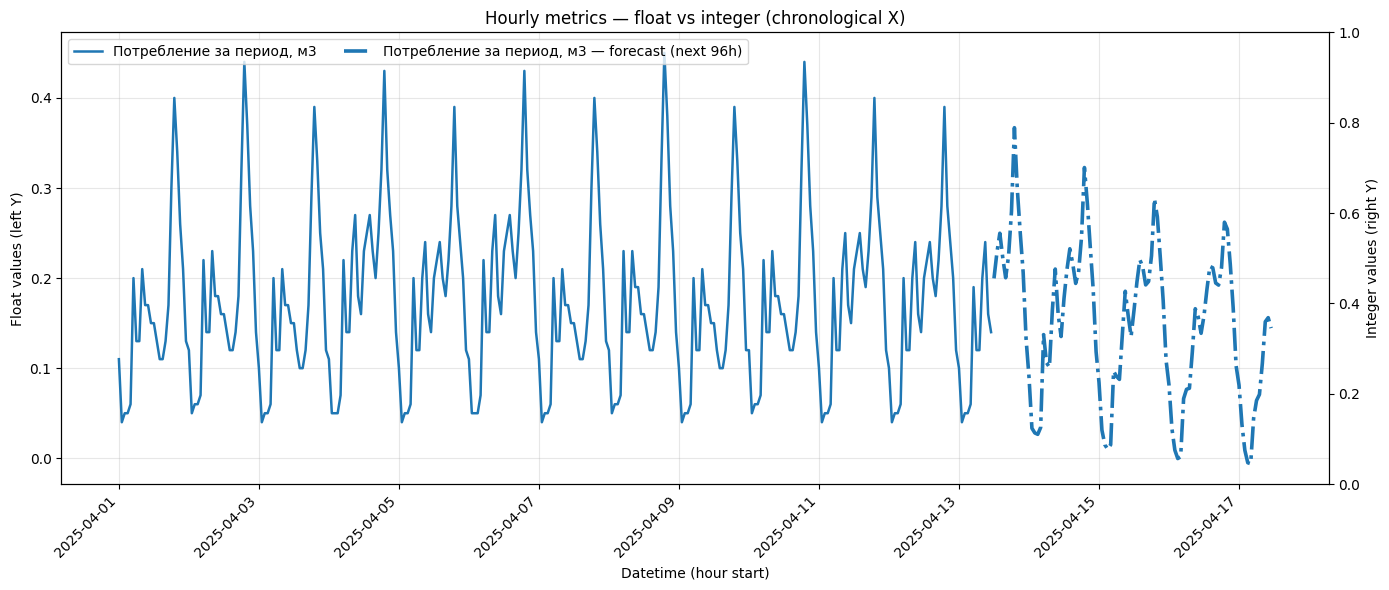

Index levels (df_indexed): ['hour_start', 'date']
Float columns: ['Потребление за период, м3']
Integer-like columns: []
Forecast horizon (hours): 96
Forecast period: 2025-04-13 12:00:00  →  2025-04-17 11:00:00


In [21]:
# ───────────────────────── Imports ─────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sklearn (auto-install if missing)
import sys, subprocess, importlib
try:
    from sklearn.linear_model import LinearRegression
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "scikit-learn"])
    from sklearn.linear_model import LinearRegression

# tqdm (auto-install if missing)
try:
    from tqdm import tqdm
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "tqdm"])
    from tqdm import tqdm

# ───────────────────────── Take source DF ─────────────────────────
source_df: pd.DataFrame = dataframes_list[2].copy()

# ───────────────────────── Auto-detect columns ─────────────────────────
date_column: str = next((c for c in source_df.columns if "Дата" in str(c)), source_df.columns[0])
hour_column: str = next((c for c in source_df.columns if "сут" in str(c) or "Время" in str(c)), source_df.columns[1])

# ───────────────────────── Parse date & hour ─────────────────────────
df: pd.DataFrame = source_df.copy()[:300]  # << trimmed subset for speed; remove slicing to use full dataset
df["date"] = pd.to_datetime(df[date_column], dayfirst=True, errors="coerce")

# Normalize hour like "0-1" -> 0, "13:00" -> 13, etc.
df["hour_start"] = (
    df[hour_column].astype(str)
    .str.extract(r"^\s*(\d+)")
    .iloc[:, 0]
    .astype(float)
    .astype(int)
)

# Datetime for plotting
df["datetime_start"] = df["date"] + pd.to_timedelta(df["hour_start"], unit="h")

# ───────────────────────── Detect numeric columns ─────────────────────────
helper_columns = {date_column, hour_column, "date", "hour_start", "datetime_start"}
candidate_columns = [c for c in df.columns if c not in helper_columns]

float_columns: list[str] = []
int_columns: list[str] = []

for column_name in candidate_columns:
    numeric_series = pd.to_numeric(df[column_name], errors="coerce")
    df[column_name] = numeric_series
    non_na = numeric_series.dropna()
    if non_na.empty:
        continue
    if np.isclose(non_na % 1, 0).all():
        int_columns.append(column_name)
    else:
        float_columns.append(column_name)

if not (float_columns or int_columns):
    raise ValueError("No numeric columns found for plotting and forecasting.")

# ───────────────────────── Prepare frames ─────────────────────────
df_indexed = df.set_index(["hour_start", "date"])  # keep structure
df_plot = df.sort_values("datetime_start").reset_index(drop=True)
datetime_series_full: pd.Series = df_plot["datetime_start"]

# ───────────────────────── Helpers for LR forecast & CV ─────────────────────────
def build_time_features(dt_series: pd.Series, values_series: pd.Series) -> pd.DataFrame:
    """Create regression features aligned to dt_series index."""
    features = pd.DataFrame(index=dt_series.index)
    features["time_index"] = np.arange(len(dt_series))
    features["hour_of_day"] = dt_series.dt.hour
    features["day_of_week"] = dt_series.dt.dayofweek
    features["sin_hour"] = np.sin(2 * np.pi * features["hour_of_day"] / 24)
    features["cos_hour"] = np.cos(2 * np.pi * features["hour_of_day"] / 24)
    features["lag_1"] = values_series.shift(1)
    features["lag_24"] = values_series.shift(24)
    features["roll_mean_24"] = values_series.rolling(window=24, min_periods=1).mean()
    return features

def pick_forecast_style(history_linestyle: str) -> dict:
    """Return linestyle/linewidth for forecast given history style."""
    ls = history_linestyle or "-"
    if ls in ("-", "solid"):
        return {"linestyle": "-.", "linewidth": 2.6}
    if ls in ("--", "dashed"):
        return {"linestyle": ":", "linewidth": 2.6}
    return {"linestyle": "-.", "linewidth": 2.6}

def mae(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    diffs = np.abs(y_true - y_pred)
    return float(np.mean(diffs)) if diffs.size else np.nan

def rmse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    diffs2 = (y_true - y_pred) ** 2
    return float(np.sqrt(np.mean(diffs2))) if diffs2.size else np.nan

def smape(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred)
    mask = denom > 1e-9
    if not np.any(mask):
        return np.nan
    return float(100.0 * np.mean(diff[mask] / denom[mask]))

def walk_forward_cv_for_series(
    values_series: pd.Series,
    dt_series: pd.Series,
    forecast_horizon_hours: int = 24 * 4,
    step_size_hours: int = 24,
    min_train_points_hint: int | None = None,
) -> dict:
    """
    Expanding-window CV with recursive multi-step forecasts.
    Returns metrics summary + per-horizon MAE.
    """
    values_series = values_series.astype(float)
    features_full = build_time_features(dt_series, values_series)
    train_mask = features_full[["lag_1", "lag_24"]].notna().all(axis=1) & values_series.notna()

    # Determine minimal train end position that covers 'min_train_points' valid rows
    valid_cum_count = train_mask.astype(int).cumsum()
    total_valid_points = int(train_mask.sum())

    if total_valid_points < 5 + forecast_horizon_hours:
        return {
            "n_folds": 0,
            "n_eval_points": 0,
            "mae": np.nan, "rmse": np.nan, "smape": np.nan,
            "mae_per_h": [np.nan] * forecast_horizon_hours,
            "all_true": np.array([]), "all_pred": np.array([]),
        }

    if min_train_points_hint is None:
        # Heuristic: at least 96 valid points, but adapt to short series
        min_train_points = 96 if total_valid_points >= (96 + forecast_horizon_hours) else max(24, total_valid_points - forecast_horizon_hours - 1)
    else:
        min_train_points = min(min_train_points_hint, total_valid_points - forecast_horizon_hours - 1)

    # First index where we have >= min_train_points valid rows AND current row is valid
    candidates = np.where((valid_cum_count.values >= min_train_points) & train_mask.values)[0]
    if candidates.size == 0:
        return {
            "n_folds": 0,
            "n_eval_points": 0,
            "mae": np.nan, "rmse": np.nan, "smape": np.nan,
            "mae_per_h": [np.nan] * forecast_horizon_hours,
            "all_true": np.array([]), "all_pred": np.array([]),
        }
    first_train_end_pos = int(candidates[0])

    all_true_list: list[float] = []
    all_pred_list: list[float] = []
    per_horizon_errors: list[list[float]] = [[] for _ in range(forecast_horizon_hours)]
    n_folds = 0

    train_end_pos = first_train_end_pos
    last_possible_train_end = len(values_series) - forecast_horizon_hours - 1

    while train_end_pos <= last_possible_train_end:
        # Ensure we end on a valid row; if not, move forward until valid or break
        while train_end_pos <= last_possible_train_end and not bool(train_mask.iloc[train_end_pos]):
            train_end_pos += 1
        if train_end_pos > last_possible_train_end:
            break

        # Train on all valid rows up to train_end_pos
        train_window_mask = train_mask.copy()
        train_window_mask.iloc[train_end_pos + 1 :] = False

        X_train = features_full.loc[train_window_mask]
        y_train = values_series.loc[train_window_mask]

        if len(y_train) < 5:
            train_end_pos += step_size_hours
            continue

        model = LinearRegression()
        model.fit(X_train, y_train)

        # Recursive forecast for next H hours
        last_dt_fold = dt_series.iloc[train_end_pos]
        extended_values = values_series.iloc[: train_end_pos + 1].dropna().tolist()
        fold_forecast: list[float] = []
        fold_datetimes: list[pd.Timestamp] = []

        for step_ahead in range(1, forecast_horizon_hours + 1):
            future_dt = last_dt_fold + pd.Timedelta(hours=step_ahead)
            future_time_index = int(features_full["time_index"].iloc[train_end_pos]) + step_ahead
            hour_of_day = future_dt.hour
            day_of_week = future_dt.dayofweek
            sin_hour = np.sin(2 * np.pi * hour_of_day / 24)
            cos_hour = np.cos(2 * np.pi * hour_of_day / 24)

            lag_1 = extended_values[-1]
            lag_24 = extended_values[-24] if len(extended_values) >= 24 else lag_1
            roll_mean_24 = np.mean(extended_values[-24:]) if len(extended_values) >= 1 else lag_1

            X_future_row = pd.DataFrame(
                {
                    "time_index": [future_time_index],
                    "hour_of_day": [hour_of_day],
                    "day_of_week": [day_of_week],
                    "sin_hour": [sin_hour],
                    "cos_hour": [cos_hour],
                    "lag_1": [lag_1],
                    "lag_24": [lag_24],
                    "roll_mean_24": [roll_mean_24],
                }
            )
            y_pred_val = float(model.predict(X_future_row)[0])
            extended_values.append(y_pred_val)
            fold_forecast.append(y_pred_val)
            fold_datetimes.append(future_dt)

        # Compare with ground truth
        y_true_window = values_series.iloc[train_end_pos + 1 : train_end_pos + 1 + forecast_horizon_hours].to_numpy()
        y_pred_window = np.array(fold_forecast)

        valid_eval_mask = ~np.isnan(y_true_window)
        y_true_eval = y_true_window[valid_eval_mask]
        y_pred_eval = y_pred_window[valid_eval_mask]

        # Horizon-wise errors (only where truth is available)
        for h in range(forecast_horizon_hours):
            if h < len(y_true_window) and not np.isnan(y_true_window[h]):
                per_horizon_errors[h].append(abs(y_true_window[h] - y_pred_window[h]))

        all_true_list.extend(y_true_eval.tolist())
        all_pred_list.extend(y_pred_eval.tolist())
        n_folds += 1

        train_end_pos += step_size_hours  # slide window

    all_true_arr = np.array(all_true_list)
    all_pred_arr = np.array(all_pred_list)

    metrics_summary = {
        "n_folds": int(n_folds),
        "n_eval_points": int(all_true_arr.size),
        "mae": mae(all_true_arr, all_pred_arr),
        "rmse": rmse(all_true_arr, all_pred_arr),
        "smape": smape(all_true_arr, all_pred_arr),
        "mae_per_h": [float(np.mean(errs)) if len(errs) else np.nan for errs in per_horizon_errors],
        "all_true": all_true_arr,
        "all_pred": all_pred_arr,
    }
    return metrics_summary

# ───────────────────────── CV for ALL numeric columns ─────────────────────────
forecast_horizon_hours: int = 24 * 4  # 96h
cv_results_per_series: list[dict] = []
all_numeric_columns: list[str] = float_columns + int_columns

for col in tqdm(all_numeric_columns, desc="Cross-validating all series", unit="series"):
    values_series: pd.Series = df_plot[col].astype(float)
    cv_result = walk_forward_cv_for_series(
        values_series=values_series,
        dt_series=datetime_series_full,
        forecast_horizon_hours=forecast_horizon_hours,
        step_size_hours=24,
        min_train_points_hint=None,  # auto
    )
    cv_result["series_name"] = col
    cv_results_per_series.append(cv_result)

# ───────────────────────── CV summary table ─────────────────────────
cv_metrics_overview = pd.DataFrame(
    {
        "series_name": [r["series_name"] for r in cv_results_per_series],
        "n_folds": [r["n_folds"] for r in cv_results_per_series],
        "n_eval_points": [r["n_eval_points"] for r in cv_results_per_series],
        "mae": [r["mae"] for r in cv_results_per_series],
        "rmse": [r["rmse"] for r in cv_results_per_series],
        "smape": [r["smape"] for r in cv_results_per_series],
        "mae_h1": [ (r["mae_per_h"][0] if r["n_folds"]>0 else np.nan) for r in cv_results_per_series ],
        "mae_h24": [ (r["mae_per_h"][23] if r["n_folds"]>0 and len(r["mae_per_h"])>=24 else np.nan) for r in cv_results_per_series ],
        "mae_h96": [ (r["mae_per_h"][95] if r["n_folds"]>0 and len(r["mae_per_h"])>=96 else np.nan) for r in cv_results_per_series ],
    }
)

# Choose primary loss (you can switch to 'mae' or 'rmse' if needed)
primary_loss_metric: str = "smape"
cv_metrics_overview["loss"] = cv_metrics_overview[primary_loss_metric]

# Sort by LOSS ascending (lower is better)
cv_metrics_overview = cv_metrics_overview.sort_values(["loss", "series_name"], na_position="last").reset_index(drop=True)

print("\n===== Cross-Validation Metrics (expanding window, recursive) =====")
print(cv_metrics_overview.to_string(index=False))
mean_loss = float(cv_metrics_overview["loss"].mean(skipna=True)) if cv_metrics_overview["loss"].notna().any() else np.nan
print(f"\nOverall mean LOSS ({primary_loss_metric.upper()}): {mean_loss:.4f}")

# ───────────────────────── Plot history ─────────────────────────
fig, ax_left = plt.subplots(figsize=(14, 6))
ax_right = ax_left.twinx()

# Remember plotted line styles/colors to reuse for forecast
series_plot_info: dict[str, dict] = {}

# Float series (solid)
for col in float_columns:
    line = ax_left.plot(df_plot["datetime_start"], df_plot[col], label=col, linewidth=1.8)[0]
    series_plot_info[col] = {
        "axis": ax_left,
        "color": line.get_color(),
        "history_linestyle": line.get_linestyle(),  # usually '-'
    }

# Integer-like series (dashed)
for col in int_columns:
    line = ax_right.plot(df_plot["datetime_start"], df_plot[col].astype(float),
                         linestyle="--", label=col, linewidth=1.8)[0]
    series_plot_info[col] = {
        "axis": ax_right,
        "color": line.get_color(),
        "history_linestyle": line.get_linestyle(),  # '--'
    }

ax_left.set_title("Hourly metrics — float vs integer (chronological X)")
ax_left.set_xlabel("Datetime (hour start)")
ax_left.set_ylabel("Float values (left Y)")
ax_right.set_ylabel("Integer values (right Y)")
plt.setp(ax_left.get_xticklabels(), rotation=45, ha="right")

# ───────────────────────── Train on full history & plot forecast ─────────────────────────
last_dt: pd.Timestamp = datetime_series_full.iloc[-1]
for col in tqdm(all_numeric_columns, desc="Forecasting all series", unit="series"):
    values_series: pd.Series = df_plot[col].astype(float)

    features_full = build_time_features(datetime_series_full, values_series)
    train_mask = features_full[["lag_1", "lag_24"]].notna().all(axis=1) & values_series.notna()
    if train_mask.sum() < 5:
        continue

    X_train = features_full.loc[train_mask]
    y_train = values_series.loc[train_mask]

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Recursive forecast on full history
    extended_values = values_series.dropna().tolist()
    forecast_datetimes: list[pd.Timestamp] = []
    forecast_values: list[float] = []

    for step in range(1, forecast_horizon_hours + 1):
        future_dt = last_dt + pd.Timedelta(hours=step)
        future_time_index = int(features_full["time_index"].iloc[-1]) + step
        hour_of_day = future_dt.hour
        day_of_week = future_dt.dayofweek
        sin_hour = np.sin(2 * np.pi * hour_of_day / 24)
        cos_hour = np.cos(2 * np.pi * hour_of_day / 24)

        lag_1 = extended_values[-1]
        lag_24 = extended_values[-24] if len(extended_values) >= 24 else lag_1
        roll_mean_24 = np.mean(extended_values[-24:]) if len(extended_values) >= 1 else lag_1

        X_future_row = pd.DataFrame(
            {
                "time_index": [future_time_index],
                "hour_of_day": [hour_of_day],
                "day_of_week": [day_of_week],
                "sin_hour": [sin_hour],
                "cos_hour": [cos_hour],
                "lag_1": [lag_1],
                "lag_24": [lag_24],
                "roll_mean_24": [roll_mean_24],
            }
        )

        y_future_pred = float(model.predict(X_future_row)[0])
        extended_values.append(y_future_pred)
        forecast_datetimes.append(future_dt)
        forecast_values.append(y_future_pred)

    axis_for_series = series_plot_info[col]["axis"]
    color_for_series = series_plot_info[col]["color"]
    history_ls = series_plot_info[col]["history_linestyle"]
    style_kwargs = pick_forecast_style(history_ls)

    axis_for_series.plot(
        forecast_datetimes,
        forecast_values,
        label=f"{col} — forecast (next {forecast_horizon_hours}h)",
        color=color_for_series,
        **style_kwargs,
        zorder=5,
    )

# ───────────────────────── Legend / finalize ─────────────────────────
handles_left, labels_left = ax_left.get_legend_handles_labels()
handles_right, labels_right = ax_right.get_legend_handles_labels()
ax_left.legend(handles_left + handles_right, labels_left + labels_right, loc="upper left", ncol=2)

ax_left.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()

# ───────────────────────── Sanity output ─────────────────────────
print("Index levels (df_indexed):", df_indexed.index.names)
print("Float columns:", float_columns)
print("Integer-like columns:", int_columns)
print(f"Forecast horizon (hours): {forecast_horizon_hours}")
print(f"Forecast period: {last_dt + pd.Timedelta(hours=1)}  →  {last_dt + pd.Timedelta(hours=forecast_horizon_hours)}")
